# Centrality of C-Suite Executives

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock_df = pd.read_csv('/content/drive/Shareddrives/Vanguard Practicum Project/Colab. Code/Primary Code/dow_fin_monthly.csv')

<ipython-input-84-857593f786c8>:1: DtypeWarning: Columns (94,98) have mixed types. Specify dtype option on import or set low_memory=False.
  stock_df = pd.read_csv('/content/drive/Shareddrives/Vanguard Practicum Project/Colab. Code/Primary Code/dow_fin_monthly.csv')


In [ ]:
# Cleanup and format stock_df
stock_df.columns = map(str.lower, stock_df.columns)
stock_df = stock_df.rename(columns={'tic': 'ticker'})
stock_df.rename(columns = {'date_x':'public_date'}, inplace = True)
stock_df['public_date'] = pd.to_datetime(stock_df['public_date'])

# Extract the year before converting the 'public_date' column to a string
stock_df['year'] = stock_df['public_date'].dt.year
stock_df['month'] = stock_df['public_date'].dt.month
# Convert the 'public_date' column to a string
stock_df['public_date'] = stock_df['public_date'].dt.strftime('%m/%d/%Y')


# Load the executive data into exec_df
exec_df = pd.read_csv('/content/drive/Shareddrives/Vanguard Practicum Project/Colab. Code/Primary Code/rm_directors.csv')
exec_df.columns = map(str.lower, exec_df.columns)

In [ ]:
stock_df.sort_values(by='ticker').head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
0              0  08/31/1982  1356.0  24643.0  12/31/1981  06/30/1982   6.263   
1148        1148  10/31/1986  1356.0  24643.0  12/31/1985  06/30/1986  22.903   
9352        9352  04/30/2012  1356.0  24643.0  12/31/2011  12/31/2011  19.285   
7258        7258  05/31/2006  1356.0  24643.0  12/31/2005  03/31/2006  26.357   
8631        8631  04/30/2010  1356.0  24643.0  12/31/2009  12/31/2009  13.162   

         bm     evm  pe_op_basic  pe_op_dil   pe_exi   pe_inc     ps     pcf  \
0     1.959   7.181          NaN        NaN   14.438   12.777  0.457   4.681   
1148  1.178   7.529          NaN        NaN -196.880 -168.750  0.646   4.979   
9352  1.541   5.716       12.163     12.973   17.691   17.691  0.416   4.733   
7258  0.556   8.469       58.024     58.380   52.286   52.575  1.043  16.216   
8631  0.811  42.071      -21.317    -21.317  -12.670  -10.919  0.744  10.046   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
0     0.016  0.032  0.098  0.033  0.174  0.027  0.096  0.084  0.045  0.036   
1148    NaN -0.002  0.131  0.058  0.215 -0.014  0.070  0.100 -0.002  0.059   
9352  0.211  0.025  0.131  0.071  0.179  0.043  0.092  0.082  0.044  0.078   
7258  0.328  0.061  0.145  0.097  0.202  0.093  0.107  0.114  0.112  0.127   
8631    NaN -0.053  0.033 -0.038  0.097 -0.081  0.021  0.016 -0.080 -0.032   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
0      0.233      0.049           0.065          0.049        0.041   
1148     NaN     -0.004           0.033         -0.003        0.068   
9352   0.240      0.045           0.053          0.045        0.083   
7258   0.228      0.120           0.115          0.119        0.180   
8631     NaN     -0.082          -0.014         -0.082       -0.035   

      pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
0              0.034  0.147          0.673        0.313           0.320   
1148           0.057  0.164          0.674        0.313           0.323   
9352           0.066  0.111          0.534        0.334           0.363   
7258           0.120  0.158          0.668        0.264           0.342   
8631          -0.027  0.046          0.504        0.366           0.400   

      capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
0             0.313     0.110        0.108    0.030     0.475     0.442   
1148          0.313     0.119        0.115    0.114     0.325     0.446   
9352          0.384     0.067        0.063    0.085     0.376     0.252   
7258          0.283     0.066        0.051    0.029     0.402     0.397   
8631          0.419     0.073        0.062    0.065     0.332     0.311   

      debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
0       0.256        3.096       0.022      0.274    0.556       0.672   
1148    0.249        2.497       0.033      0.262    0.511       0.807   
9352    0.234        2.875       0.078      0.262    0.377       0.542   
7258    0.204        1.808       0.226      0.387    0.282       0.522   
8631    0.255       16.123       0.086      0.236    0.392       0.112   

      ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  \
0       0.667      0.199   -0.355     0.839    0.421        0.450   
1148    0.803      0.185    0.233     0.914    0.409        0.471   
9352    0.365      0.096    0.413     1.181    0.609        0.571   
7258    0.232      0.088   -0.392     1.447    0.371        0.560   
8631    0.252      0.060   -0.185     1.156    0.704        0.596   

      debt_capital  de_ratio  intcov  intcov_ratio  cash_ratio  quick_ratio  \
0            0.358     0.817   1.968         1.022       0.111        1.254   
1148         0.359     0.891   0.950         1.555       0.435        1.447   
9352         0.466     1.656   2.051         3.050       0.322        0.801   
7258         0.410     1.397   5.541         7.295       0.075  

In [ ]:
stock_df_copy = stock_df.copy()

In [ ]:
#Need to filter out the values we aren't using
filter_values = stock_df['ticker'].unique().tolist()
#filter_values = ['WBA', 'V', 'CRM', 'CVX', 'PG', 'VZ', 'WMT', 'UNH', 'TRV', 'MCD', 'MMM', 'NKE', 'MRK', 'MSFT', 'JPM', 'KO', 'JNJ', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'DIS', 'CAT', 'CSCO', 'AXP', 'BA', 'AMGN', 'AAPL', 'DOW']


In [ ]:
stock_df = stock_df[stock_df['ticker'].isin(filter_values)]
print("Stock shape:", stock_df.shape)
exec_df = exec_df[exec_df['ticker'].isin(filter_values)]
print("Exeuctive shape:", exec_df.shape)

Stock shape: (13216, 105)
Exeuctive shape: (8892, 63)


### Freeman Betweenness Centrality

Value of importance based on the number of shortest paths between that node and other nodes in the network.

Given an graph with N nodes, represented by an N x N adjacency matrix A, and a vector b representing the betweenness centrality values for each node,

Calculate the shortest path lengths between all pairs of nodes using an algorithm such as Dijkstra's algorithm.

For each node i, count the number of shortest paths that pass through it, and divide by the total number of shortest paths between all pairs of nodes in the network:

$$b_i = \frac{1}{(N-1)(N-2)}\sum_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}$$

where $\sigma_{st}$ is the total number of shortest paths between nodes s and t, and $\sigma_{st}(i)$ is the number of shortest paths between s and t that pass through node i.

### Eigenvector Centrality

Value from one axis of greatest commonality/centrality amongst the elements of our feature space. Think of it like the eigenvector associated with the largest eigenvalue of the adjacency matrix

Given an undirected graph with N nodes, represented by an N x N adjacency matrix A, and a vector x representing the centrality values for each node,

Normalize the adjacency matrix A by dividing each row by the sum of its elements, so that each row represents the probability of moving from one node to another through a random walk:

$$P_{ij} = \frac{A_{ij}}{\sum_k A_{ik}}$$

Calculate the eigenvector v of the normalized adjacency matrix A corresponding to the largest eigenvalue λ, using an iterative algorithm such as the power method:

$$A v = \lambda v$$

where $v$ is the eigenvector and $\lambda$ is the corresponding eigenvalue.

The eigenvector centrality values for each node are given by the corresponding elements of the eigenvector v:

$$c_i = v_i$$

In other words, the eigenvector centrality of a node is proportional to the sum of the eigenvector centrality values of its neighbors, weighted by the strength of the connections between them:

$$c_i = \sum_j A_{ij} \frac{c_j}{\sum_k A_{jk}}$$

### Closeness Centrality

This value is how easily it is able to reach any other node on the network. Essentially, the the reciprocal of the sum of the shortest distances from that node to all other nodes in the graph.

$$C_i = \frac{1}{\sum_{j\neq i} d_{ij}}$$

where $C_i$ is the closeness centrality of node $i$, $d_{ij}$ is the shortest path between nodes $i$ and $j$, and the sum is taken over all nodes $j$ that are not equal to node $i$.

This one didn't really help our model much.

In [ ]:
import networkx as nx
import pandas as pd

def create_graph_and_compute_centralities(exec_df):
    G = nx.Graph()

    for company_id, director_rows in exec_df.groupby('company_id'):
        directors = director_rows['director_detail_id'].tolist()
        G.add_nodes_from(directors)
        G.add_edges_from((director1, director2) for director1 in directors for director2 in directors if director1 != director2)

    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    eigen_centrality = nx.eigenvector_centrality(G)

    return betweenness_centrality, closeness_centrality, degree_centrality, eigen_centrality

betweenness_centrality, closeness_centrality, degree_centrality, eigen_centrality = create_graph_and_compute_centralities(exec_df)



In [ ]:
def add_centrality_to_dataframe(df, centrality_dict, centrality_name):
    centrality_df = pd.DataFrame(list(centrality_dict.items()), columns=['director_detail_id', centrality_name])
    return df.merge(centrality_df, on='director_detail_id', how='left')

exec_df = add_centrality_to_dataframe(exec_df, betweenness_centrality, 'betweenness_centrality')
exec_df = add_centrality_to_dataframe(exec_df, eigen_centrality, 'eigenvector_centrality')
exec_df = add_centrality_to_dataframe(exec_df, closeness_centrality, 'closeness_centrality')
exec_df = add_centrality_to_dataframe(exec_df, degree_centrality, 'degree_centrality')

In [ ]:
# aggregate centrality values
comp_centrality = exec_df.groupby(['year', 'ticker'])[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']].mean().reset_index()

In [ ]:
comp_centrality.head()

year ticker  betweenness_centrality  eigenvector_centrality  \
0  2007.0     AA                0.003201                0.052698   
1  2007.0   AAPL                0.001131                0.008474   
2  2007.0    AIG                0.004156                0.081405   
3  2007.0   AMGN                0.001458                0.006298   
4  2007.0    AXP                0.003935                0.015978   

   closeness_centrality  degree_centrality  
0              0.355574           0.036246  
1              0.355853           0.017524  
2              0.371824           0.043166  
3              0.345497           0.026227  
4              0.360522           0.035946

#### Merge with stock_df data

In [ ]:
stock_df[stock_df.year >=2007].sort_values(by='ticker').head(10)

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
9262        9262  01/31/2012  1356.0  24643.0  12/31/2010  09/30/2011  14.591   
9442        9442  07/31/2012  1356.0  24643.0  12/31/2011  03/31/2012  15.778   
8128        8128  11/30/2008  1356.0  24643.0  12/31/2007  09/30/2008   4.967   
9382        9382  05/31/2012  1356.0  24643.0  12/31/2011  03/31/2012  15.924   
8391        8391  08/31/2009  1356.0  24643.0  12/31/2008  06/30/2009   8.019   
8782        8782  09/30/2010  1356.0  24643.0  12/31/2009  06/30/2010  12.208   
8902        8902  01/31/2011  1356.0  24643.0  12/31/2009  09/30/2010  18.196   
7548        7548  03/31/2007  1356.0  24643.0  12/31/2006  12/31/2006  23.291   
7954        7954  05/31/2008  1356.0  24643.0  12/31/2007  03/31/2008  20.749   
8070        8070  09/30/2008  1356.0  24643.0  12/31/2007  06/30/2008  10.978   

         bm     evm  pe_op_basic  pe_op_dil   pe_exi   pe_inc     ps     pcf  \
9262  1.459   6.874       30.788     32.774   32.084   32.084  0.439   4.467   
9442  1.318   7.251       43.068     45.375   74.735   74.735  0.361   4.121   
8128  0.860   9.253       16.639     16.725   15.084   15.371  0.301   6.786   
9382  1.318   7.251       43.475     45.804   75.441   75.441  0.365   4.159   
8391  1.306  25.203      -53.162    -53.162  -21.518  -16.284  0.558  20.527   
8782  1.222  10.521      125.276    125.276 -139.730 -139.730  0.615   6.844   
8902  1.075   9.736      171.414    171.414 -184.110 -171.410  0.814   8.404   
7548  0.589   6.494       12.151     12.283   13.725   13.191  0.970  11.483   
7954  0.554   9.635       61.500     61.812   47.753   47.566  1.109  14.410   
8070  0.595   9.911       35.841     36.225   28.108   28.108  0.633   9.399   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
9262  0.123  0.043  0.146  0.086  0.196  0.067  0.112  0.090  0.074  0.090   
9442  0.335  0.016  0.117  0.058  0.165  0.028  0.081  0.073  0.027  0.060   
8128  0.319  0.062  0.145  0.101  0.198  0.085  0.105  0.105  0.107  0.119   
9382  0.335  0.016  0.117  0.058  0.165  0.028  0.081  0.073  0.027  0.060   
8391  2.441 -0.067  0.043 -0.014  0.101 -0.088 -0.010  0.023 -0.098 -0.013   
8782    NaN -0.012  0.110  0.039  0.167 -0.008  0.064  0.058 -0.019  0.034   
8902    NaN -0.013  0.113  0.044  0.168 -0.009  0.063  0.062 -0.020  0.040   
7548  0.242  0.071  0.178  0.136  0.231  0.113  0.113  0.153  0.146  0.198   
7954  0.267  0.074  0.148  0.105  0.203  0.132  0.117  0.113  0.131  0.132   
8070  0.283  0.070  0.143  0.099  0.199  0.125  0.114  0.106  0.121  0.120   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
9262   0.270      0.074           0.069          0.074        0.096   
9442   0.240      0.027           0.042          0.027        0.066   
8128   0.346      0.111           0.112          0.111        0.154   
9382   0.240      0.027           0.042          0.027        0.066   
8391   0.432     -0.102          -0.030         -0.101       -0.015   
8782     NaN     -0.020           0.018         -0.020        0.036   
8902     NaN     -0.021           0.017         -0.021        0.043   
7548   0.243      0.155           0.159          0.154        0.264   
7954   0.346      0.137           0.132          0.137        0.174   
8070   0.346      0.126           0.123          0.126        0.157   

      pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
9262           0.077  0.120          0.544        0.322           0.344   
9442           0.052  0.102          0.544        0.324           0.352   
8128           0.110  0.144          0.619        0.273           0.345   
9382           0.052  0.102          0.544        0.324           0.352   
8391          -0.011  0.056          0.529        0.361           0.420   
8782           0.029  0.088          0.514        0.357           0.400   
8902           0.034  0.092          0.513        0.355           0

In [ ]:
merged_df = stock_df.merge(comp_centrality, on = ['year', 'ticker'], how = 'left')

In [ ]:
merged_df = merged_df.dropna(subset=['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality'])


In [ ]:
merged_df.head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
7489        7489  01/31/2007  1300.0  10145.0  12/31/2005  09/30/2006  40.460   
7490        7490  01/31/2007  1356.0  24643.0  12/31/2005  09/30/2006  25.472   
7491        7491  01/31/2007  1447.0  59176.0  12/31/2005  09/30/2006  25.541   
7492        7492  01/31/2007  1487.0  66800.0  12/31/2005  09/30/2006  21.024   
7493        7493  01/31/2007  2136.0  65875.0  12/31/2005  09/30/2006  24.704   

         bm     evm  pe_op_basic  pe_op_dil   pe_exi   pe_inc     ps     pcf  \
7489  0.355   9.362       16.495     16.554   19.038   18.880  1.229  13.281   
7490  0.635   7.042       39.713     40.041   40.207   40.041  0.964  12.331   
7491  0.159  20.957       20.572     21.018   20.867   20.572  2.568   9.771   
7492  0.558  15.696      293.148    295.043  325.952  325.178  1.613  22.073   
7493  0.629   5.870       18.519     18.790   20.599   16.391  1.344   4.489   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
7489  0.366  0.066  0.136  0.111  0.269  0.090  0.092  0.128  0.172  0.203   
7490  0.248  0.073  0.171  0.127  0.225  0.119  0.116  0.144  0.144  0.177   
7491  0.167  0.128  0.192  0.186  0.192  0.181  0.154  0.046  0.334  0.088   
7492  0.145  0.100  0.185  0.162  0.185  0.151  0.124  0.024  0.123  0.078   
7493  0.862  0.065  0.339  0.167  0.615  0.141  0.252  0.161  0.085  0.167   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
7489   0.318      0.180           0.155          0.180        0.498   
7490   0.228      0.153           0.145          0.153        0.248   
7491   0.242      0.334           0.000          0.334          NaN   
7492   0.280      0.125           0.005          0.125          NaN   
7493   0.235      0.128           0.124          0.128        0.205   

      pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
7489           0.200  0.252          0.749        0.251           0.363   
7490           0.164  0.186          0.683        0.244           0.356   
7491             NaN  0.045          0.243        0.757           1.138   
7492             NaN  0.023          0.465        0.504           0.759   
7493           0.144  0.285          0.424        0.311           0.402   

      capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
7489          0.251     0.101        0.070    0.065     0.295     0.437   
7490          0.263     0.073        0.050    0.028     0.407     0.396   
7491          0.757     0.008        0.004    0.076       NaN       NaN   
7492          0.520     0.088        0.041    0.069       NaN       NaN   
7493          0.423     0.085        0.066    0.032     0.087     0.527   

      debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
7489    0.166        1.307       0.310      0.477    0.174       0.406   
7490    0.208        1.474       0.313      0.419    0.256       0.604   
7491    0.429        8.821       0.335        NaN    0.314         NaN   
7492    0.164        7.158       0.336        NaN    0.122         NaN   
7493    0.231        1.469       0.225      0.288    0.295       0.900   

      ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  \
7489    0.277      0.116    0.765     4.563    0.321        0.657   
7490    0.276      0.088   -0.233     1.423    0.337        0.558   
7491      NaN      0.078    0.902    47.037    3.112        0.908   
7492      NaN      0.033    0.035    17.197    1.065        0.893   
7493    0.796      0.216    0.356     1.361    0.492        0.605   

      debt_capital  de_ratio  intcov  intcov_ratio  cash_ratio  quick_ratio  \
7489         0.432     1.917   6.314         8.936       0.136        0.848   
7490         0.416     1.391   6.734        10.024       0.068        0.681   
7491         0.892     9.906  17.953        24.526         NaN          NaN   
7492         0.638     8.904   2.827         3.822         NaN  

In [ ]:
merged_df.shape

(5672, 109)

In [ ]:
stock_df.columns

Index(['unnamed: 0', 'public_date', 'gvkey', 'permno', 'adate', 'qdate',
       'capei', 'bm', 'evm', 'pe_op_basic',
       ...
       'shrout', 'cfacpr', 'cfacshr', 'retx', 'sprtrn', 'prc_splitadj',
       'shrout_splitadj', 'mktcap', 'year', 'month'],
      dtype='object', length=105)

In [ ]:
merged_df.to_csv('dow_centrality.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('dow_centrality.csv')

In [ ]:
merged_df.sort_values(by='ticker').head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
8273        8273  04/30/2009  1356.0  24643.0  12/31/2008  12/31/2008   5.817   
9382        9382  05/31/2012  1356.0  24643.0  12/31/2011  03/31/2012  15.924   
8661        8661  05/31/2010  1356.0  24643.0  12/31/2009  03/31/2010  10.852   
7954        7954  05/31/2008  1356.0  24643.0  12/31/2007  03/31/2008  20.749   
8186        8186  01/31/2009  1356.0  24643.0  12/31/2007  09/30/2008   3.596   

         bm     evm  pe_op_basic  pe_op_dil  pe_exi   pe_inc     ps     pcf  \
8273  1.332   6.346        7.031      7.086  32.393 -100.780  0.328   7.161   
9382  1.318   7.251       43.475     45.804  75.441   75.441  0.365   4.159   
8661  0.868  15.691     -291.000   -291.000 -49.183  -40.138  0.620   6.477   
7954  0.554   9.635       61.500     61.812  47.753   47.566  1.109  14.410   
8186  0.860   9.253       12.046     12.109  10.921   11.129  0.218   4.913   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
8273  2.441  0.009  0.130  0.084  0.183  0.029  0.054  0.091  0.016  0.098   
9382  0.335  0.016  0.117  0.058  0.165  0.028  0.081  0.073  0.027  0.060   
8661    NaN -0.036  0.077  0.005  0.139 -0.042  0.040  0.039 -0.054  0.004   
7954  0.267  0.074  0.148  0.105  0.203  0.132  0.117  0.113  0.131  0.132   
8186  0.319  0.062  0.145  0.101  0.198  0.085  0.105  0.105  0.107  0.119   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
8273   0.432      0.016           0.045          0.017        0.126   
9382   0.240      0.027           0.042          0.027        0.066   
8661     NaN     -0.055          -0.000         -0.055        0.005   
7954   0.346      0.137           0.132          0.137        0.174   
8186   0.346      0.111           0.112          0.111        0.154   

      pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
8273           0.090  0.130          0.511        0.373           0.463   
9382           0.052  0.102          0.544        0.324           0.352   
8661           0.004  0.070          0.511        0.365           0.401   
7954           0.124  0.154          0.646        0.255           0.320   
8186           0.110  0.144          0.619        0.273           0.345   

      capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
8273          0.420     0.077        0.062    0.032     0.397     0.318   
9382          0.372     0.068        0.063    0.071     0.397     0.283   
8661          0.415     0.068        0.062    0.053     0.346     0.333   
7954          0.282     0.085        0.068    0.040     0.384     0.376   
8186          0.305     0.076        0.060    0.030     0.410     0.376   

      debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
8273    0.280        3.018       0.196      0.310    0.362       0.482   
9382    0.233        3.224       0.082      0.265    0.388       0.494   
8661    0.262        6.715       0.089      0.232    0.409       0.288   
7954    0.202        1.802       0.203      0.358    0.305       0.592   
8186    0.223        2.133       0.207      0.354    0.334       0.558   

      ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  \
8273    0.170      0.053   -1.766     1.346    0.709        0.621   
9382    0.370      0.096    0.383     1.129    0.591        0.552   
8661    0.356      0.060    0.253     1.137    0.698        0.584   
7954    0.308      0.153   -0.568     1.246    0.379        0.529   
8186    0.171      0.153   -1.712     1.180    0.426        0.529   

      debt_capital  de_ratio  intcov  intcov_ratio  cash_ratio  quick_ratio  \
8273         0.527     2.002   1.399         3.956       0.105        0.675   
9382         0.452     1.527   1.675         2.440       0.266        0.791   
8661         0.481     1.737  -0.137         0.163       0.227        0.892   
7954         0.399     1.290   5.069         5.819       0.112        

# Diversity Indexes

In [ ]:
# drop unimportant columns for data clearning
exec_df = exec_df.drop (columns = ['attend_less75_pct', 'business_transaction', 'type_of_services', 'charity', 'country_of_empl', 'employment_subsidiary', 'primary_employer', 'indexname', 'rt_id', 'succ_comm', 'grandfath', 'priorserv', 'exchange_type', 'prof_services_yn', 'financial_expert', 'non_ceo_leader' ])
print("Exeuctive shape:", exec_df.shape)

#Dropping NaNs
exec_df.dropna(subset = ['age', 'prititle',  'dirsince', 'classification', 'num_of_shares'], how = 'any', inplace = True)

Exeuctive shape: (8892, 51)


In [ ]:
# make variable OTHERTITLE binary
def convert_to_binary(value):
    if pd.isna(value) or value == "" or value.lower() == "nan":
        return 0
    else:
        return 1

In [ ]:
exec_df['othertitle'] = exec_df['othertitle'].apply(convert_to_binary)
exec_df['female'] = exec_df['female'].apply(convert_to_binary)
exec_df['relation'] = exec_df['relation'].apply(convert_to_binary)
exec_df['interlocking'] = exec_df['interlocking'].apply(convert_to_binary)
exec_df['designated'] = exec_df['designated'].apply(convert_to_binary)
exec_df['otherlink'] = exec_df['otherlink'].apply(convert_to_binary)
exec_df['nominee'] = exec_df['nominee'].apply(convert_to_binary)
exec_df['nom_membership'] = exec_df['nom_membership'].apply(convert_to_binary)
exec_df['cg_membership'] = exec_df['cg_membership'].apply(convert_to_binary)
exec_df['comp_membership'] = exec_df['comp_membership'].apply(convert_to_binary)
exec_df['audit_membership'] = exec_df['audit_membership'].apply(convert_to_binary)
exec_df['employment_ceo'] = exec_df['employment_ceo'].apply(convert_to_binary)
exec_df['employment_chairman'] = exec_df['employment_chairman'].apply(convert_to_binary)
exec_df['employment_vicechairman'] = exec_df['employment_vicechairman'].apply(convert_to_binary)
exec_df['employment_president'] = exec_df['employment_president'].apply(convert_to_binary)
exec_df['employment_treasurer'] = exec_df['employment_treasurer'].apply(convert_to_binary)
exec_df['employment_cfo'] = exec_df['employment_cfo'].apply(convert_to_binary)
exec_df['employment_coo'] = exec_df['employment_coo'].apply(convert_to_binary)
exec_df['employment_secretary'] = exec_df['employment_secretary'].apply(convert_to_binary)
exec_df['employment_svp'] = exec_df['employment_svp'].apply(convert_to_binary)
exec_df['employment_vp'] = exec_df['employment_vp'].apply(convert_to_binary)
exec_df['employment_evp'] = exec_df['employment_evp'].apply(convert_to_binary)
exec_df['relative_yn'] = exec_df['relative_yn'].apply(convert_to_binary)
exec_df['former_employee_yn'] = exec_df['former_employee_yn'].apply(convert_to_binary)
exec_df['ownless1'] = exec_df['ownless1'].apply(convert_to_binary)


missing_val = exec_df.isna().sum()
missing_val

unnamed: 0                    0
year                          0
company_id                    0
director_detail_id            0
ticker                        0
cusip                         0
name                          0
meetingdate                   0
first_name                    0
last_name                     0
fullname                      0
age                           0
ethnicity                     0
prititle                      0
othertitle                    0
dirsince                      0
classification                0
relation                      0
mtgmonth                      0
year_term_ends                0
ownless1                      0
nominee                       0
num_of_shares                 0
pcnt_ctrl_votingpower      6039
outside_public_boards         0
female                        0
nom_membership                0
cg_membership                 0
comp_membership               0
audit_membership              0
year_of_termination        8657
employme

Diversity Metrics to consider:

- Demographic diversity: This involves analyzing the representation of different demographic groups within the company, such as gender, race, ethnicity, age, and sexual orientation.
- Cognitive diversity: This measures the diversity of thoughts, ideas, and perspectives within the company, which can be assessed by analyzing the educational background, work experience, and skills of the employees.
- Turnover rate: This metric measures the rate at which employees leave the company, which can be an indicator of the company's diversity and inclusion efforts.

It is important to note that these metrics should be used in conjunction with each other, as no single metric can fully capture the complexity of diversity within a company.

demographic diversity (e.g., diversity index, representation ratios), cognitive diversity (e.g., skills diversity index), and inclusion (e.g., employee satisfaction surveys).

## Diversity by Demographics
### Gender Diversity

One simple metric is the percentage of women in the C-suite. This can be calculated by counting the number of women in C-suite positions and dividing by the total number of C-suite positions. This metric can help assess whether the company is making progress towards gender equity at the highest levels of leadership.

In [ ]:

# Group the data by company and date
grouped = exec_df.groupby(['ticker', 'year'])

# Define a function to calculate gender diversity for each group
def gender_diversity(group):
    # Count the number of women in C-suite positions
    num_women = len(group[group['female'] == 1])

    # Calculate the total number of C-suite positions
    total_positions = len(group)

    # Calculate the percentage of C-suite positions held by women
    gender_diversity = num_women / total_positions * 100

    # Return the gender diversity score
    return gender_diversity

# Apply the gender_diversity function to each group in the dataframe
gender_df = grouped.apply(gender_diversity)

# Reset the index to convert the resulting Series back to a dataframe
gender_df = gender_df.reset_index()

# Rename the columns in the resulting dataframe
gender_df.columns = ['ticker', 'year', 'gender_diversity']

gender_df

ticker    year  gender_diversity
0       AA  2007.0         25.000000
1       AA  2008.0         15.384615
2       AA  2009.0         23.076923
3       AA  2010.0         25.000000
4       AA  2011.0         30.000000
5       AA  2012.0         27.272727
6       AA  2013.0         27.272727
7       AA  2014.0         33.333333
8       AA  2015.0         27.272727
9       AA  2022.0         30.000000
10    AAPL  2007.0         12.500000
11    AAPL  2008.0         12.500000
12    AAPL  2009.0         12.500000
13    AAPL  2010.0         14.285714
14    AAPL  2011.0         14.285714
15    AAPL  2012.0         12.500000
16    AAPL  2013.0         12.500000
17    AAPL  2014.0         12.500000
18    AAPL  2015.0         28.571429
19    AAPL  2016.0         25.000000
20    AAPL  2017.0         25.000000
21    AAPL  2018.0         25.000000
22    AAPL  2019.0         25.000000
23    AAPL  2020.0         28.571429
24    AAPL  2021.0         37.500000
25    AAPL  2022.0         33.333333
26     AIG  2007.0         13.333333
27     AIG  2008.0         15.384615
28     AIG  2009.0         18.181818
29     AIG  2010.0         15.384615
30     AIG  2011.0         14.285714
31     AIG  2012.0         15.384615
32     AIG  2013.0         15.384615
33     AIG  2014.0         14.285714
34     AIG  2015.0         15.384615
35     AIG  2016.0         18.750000
36     AIG  2017.0         23.076923
37     AIG  2018.0         27.272727
38     AIG  2019.0         38.461538
39     AIG  2020.0         25.000000
40     AIG  2021.0         23.076923
41     AIG  2022.0         20.000000
42    AMGN  2007.0         10.000000
43    AMGN  2008.0          9.090909
44    AMGN  2009.0          8.333333
45    AMGN  2010.0         15.384615
46    AMGN  2011.0         16.666667
47    AMGN  2012.0         15.384615
48    AMGN  2013.0         15.384615
49    AMGN  2014.0         16.666667
50    AMGN  2015.0         15.384615
51    AMGN  2016.0         15.384615
52    AMGN  2017.0         15.384615
53    AMGN  2018.0         23.076923
54    AMGN  2019.0         25.000000
55    AMGN  2020.0         18.181818
56    AMGN  2021.0         27.272727
57    AMGN  2022.0         25.000000
58     AXP  2007.0         14.285714
59     AXP  2008.0         16.666667
60     AXP  2009.0         16.666667
61     AXP  2010.0         16.666667
62     AXP  2011.0         15.384615
63     AXP  2012.0         16.666667
64     AXP  2013.0         23.076923
65     AXP  2014.0         16.666667
66     AXP  2015.0         18.181818
67     AXP  2016.0         23.076923
68     AXP  2017.0         15.384615
69     AXP  2018.0         15.384615
70     AXP  2019.0         18.181818
71     AXP  2020.0         30.769231
72     AXP  2021.0         25.000000
73     AXP  2022.0         28.571429
74      BA  2007.0         20.000000
75      BA  2008.0          9.090909
76      BA  2009.0         11.111111
77      BA  2010.0         16.666667
78      BA  2011.0         16.666667
79      BA  2012.0         18.181818
80      BA  2013.0         18.181818
81      BA  2014.0         18.181818
82      BA  2015.0         10.000000
83      BA  2016.0         16.666667
84      BA  2017.0         15.384615
85      BA  2018.0         23.076923
86      BA  2019.0         30.769231
87      BA  2020.0         25.000000
88      BA  2021.0         20.000000
89      BA  2022.0         27.272727
90     BAC  2007.0         18.750000
91     BAC  2008.0         25.000000
92     BAC  2009.0         16.666667
93     BAC  2010.0         15.384615
94     BAC  2011.0         15.384615
95     BAC  2012.0         16.666667
96     BAC  2013.0         30.769231
97     BAC  2014.0         26.666667
98     BAC  2015.0         33.333333
99     BAC  2016.0         30.769231
100    BAC  2017.0         28.571429
101    BAC  2018.0         33.333333
102    BAC  2019.0         31.250000
103    BAC  2020.0         35.294118
104    BAC  2021.0         37.500000
105    BAC  2022.0         35.714286
106    BMY  2007.0         22.222222
107    B

#### Age Diveristy
1. Age standard deviation: This metric measures the spread of ages within a group. A high standard deviation indicates a wider range of ages, which could be considered more diverse.
2. Age distribution: This metric looks at the distribution of ages within a group. You can create a histogram or density plot to visualize the distribution and assess the level of diversity.
3. Age entropy: This metric is based on information theory and measures the level of uncertainty or randomness in the age distribution. A higher entropy score indicates a more diverse age distribution.

In [ ]:
import scipy.stats
import numpy as np

# Group the data by company and date
grouped = exec_df.groupby(['ticker', 'year'])

# Define a function to calculate age diversity for each group
def age_diversity(group):
    # Calculate the age diversity metrics
    age_mean = group['age'].mean()
    age_range = group['age'].max() - group['age'].min()
    #num_age_cohorts = len(pd.cut(group['age'], bins=5).unique())
    age_distribution = group['age'].value_counts(normalize=True)
    age_entropy = scipy.stats.entropy(age_distribution)
    #Note that entropy is the Shannon entropy/relative entropy of given distribution
    age_std_distribution = scipy.stats.tstd(group['age'])

    # Calculate the weighted average of age cohorts
    age_ranges = [(i*10, (i+1)*10-1) for i in range(10)]
    counts = [sum(1 for age in group['age'] if age >= a and age <= b) for a, b in age_ranges]
    total = sum(counts)
    weights = [count / total for count in counts]
    num_age_cohorts = (np.square(weights).sum())**-1

    # Create a dictionary of the age diversity metrics
    age_diversity = {
        'age_mean': age_mean,
        'age_range': age_range,
        'num_age_cohorts': num_age_cohorts,
        'age_entropy': age_entropy,
        'age_std_distribution': age_std_distribution
    }

    # Return the age diversity metrics
    return pd.Series(age_diversity)

# Apply the age_diversity function to each group in the dataframe
age_df = grouped.apply(age_diversity)

# Reset the index to convert the resulting Series back to a dataframe
age_df = age_df.reset_index()

# Merge the gender and age dataframes on the ticker and year columns
diversity_df = pd.merge(gender_df, age_df, on=['ticker', 'year'])

### Ethnicity

The Herfindahl-Hirschman Index (HHI) is commonly used in diversity calculations because it provides a measure of the concentration or diversity of a group, such as a workforce or a market. HHI is a measure of market concentration that is commonly used in antitrust analysis to assess competition in a market. The HHI is calculated by summing the squares of the market shares of each firm in the market. In the context of workforce diversity, the HHI can be used to measure the concentration or diversity of different demographic groups (such as ethnicity, gender, or age) within a company or industry.

In general, a higher HHI score indicates greater concentration or less diversity, while a lower HHI score indicates greater diversity.

In [ ]:
ethnicity_grouped = exec_df.groupby(['ticker', 'year'])

def ethnicity_diversity(group):
    executive_ethnicity = group['ethnicity']
    num_executives = len(executive_ethnicity)
    ethnicity_counts = pd.Series(executive_ethnicity).value_counts()
    market_share = ethnicity_counts / num_executives
    hhi = (market_share**2).sum()

    ethnicity_diversity = {
        'ethnicity_hhi': hhi
    }

    return pd.Series(ethnicity_diversity)

ethnicity_df = ethnicity_grouped.apply(ethnicity_diversity)
ethnicity_df = ethnicity_df.reset_index()

diversity_df = pd.merge(diversity_df, ethnicity_df, on=['ticker', 'year'])

diversity_df

ticker    year  gender_diversity   age_mean  age_range  num_age_cohorts  \
0       AA  2007.0         25.000000  60.625000       23.0         2.461538   
1       AA  2008.0         15.384615  63.769231       23.0         2.964912   
2       AA  2009.0         23.076923  64.076923       22.0         2.964912   
3       AA  2010.0         25.000000  63.083333       20.0         2.666667   
4       AA  2011.0         30.000000  63.700000       21.0         2.272727   
5       AA  2012.0         27.272727  65.000000       20.0         1.753623   
6       AA  2013.0         27.272727  66.090909       21.0         1.753623   
7       AA  2014.0         33.333333  66.000000       22.0         2.322581   
8       AA  2015.0         27.272727  66.272727       23.0         2.469388   
9       AA  2022.0         30.000000  61.900000       22.0         2.941176   
10    AAPL  2007.0         12.500000  58.625000       20.0         2.461538   
11    AAPL  2008.0         12.500000  59.625000       20.0         2.461538   
12    AAPL  2009.0         12.500000  60.625000       20.0         2.461538   
13    AAPL  2010.0         14.285714  62.714286       20.0         2.882353   
14    AAPL  2011.0         14.285714  62.142857       18.0         2.333333   
15    AAPL  2012.0         12.500000  62.250000       20.0         2.133333   
16    AAPL  2013.0         12.500000  63.250000       20.0         2.133333   
17    AAPL  2014.0         12.500000  64.375000       21.0         2.666667   
18    AAPL  2015.0         28.571429  61.571429       12.0         1.960000   
19    AAPL  2016.0         25.000000  62.125000       13.0         1.882353   
20    AAPL  2017.0         25.000000  63.375000       14.0         1.882353   
21    AAPL  2018.0         25.000000  64.125000       13.0         1.882353   
22    AAPL  2019.0         25.000000  65.000000       13.0         2.909091   
23    AAPL  2020.0         28.571429  66.000000       12.0         2.882353   
24    AAPL  2021.0         37.500000  66.375000       12.0         2.000000   
25    AAPL  2022.0         33.333333  66.666667       13.0         1.975610   
26     AIG  2007.0         13.333333  64.933333       23.0         2.528090   
27     AIG  2008.0         15.384615  64.461538       21.0         2.194805   
28     AIG  2009.0         18.181818  63.181818       21.0         2.951220   
29     AIG  2010.0         15.384615  63.769231       21.0         2.770492   
30     AIG  2011.0         14.285714  63.500000       21.0         2.882353   
31     AIG  2012.0         15.384615  63.692308       18.0         2.770492   
32     AIG  2013.0         15.384615  65.307692       18.0         2.522388   
33     AIG  2014.0         14.285714  65.785714       18.0         2.969697   
34     AIG  2015.0         15.384615  64.923077       17.0         2.964912   
35     AIG  2016.0         18.750000  63.062500       38.0         3.282051   
36     AIG  2017.0         23.076923  63.153846       36.0         2.315068   
37     AIG  2018.0         27.272727  67.090909       13.0         1.983607   
38     AIG  2019.0         38.461538  65.692308       16.0         2.086420   
39     AIG  2020.0         25.000000  67.000000       16.0         2.322581   
40     AIG  2021.0         23.076923  65.230769       21.0         2.864407   
41     AIG  2022.0         20.000000  66.300000       21.0         2.631579   
42    AMGN  2007.0         10.000000  65.500000       13.0         1.851852   
43    AMGN  2008.0          9.090909  66.363636       12.0         1.657534   
44    AMGN  2009.0          8.333333  67.000000       12.0         1.600000   
45    AMGN  2010.0         15.384615  66.615385       25.0         1.857143   
46    AMGN  2011.0         16.666667  66.166667       23.0         1.945946   
47    AMGN  2012.0         15.384615  64.384615       25.0         2.522388   
48    AMGN  2013.0         15.384615  64.692308       25.0         2.770492   
49    AMGN  2014.0         16.666667  64.166667       

### Former Employees

Although most firms believe the number of former employees in positions of leadership aren't importat to overall firm importance, our group still wanted to measure how the % makeup of board members who were former employees effects our target


In [ ]:
# Group the data by company and date
grouped = exec_df.groupby(['ticker', 'year'])

# Define a function to calculate Former Employee diversity for each group
def emp_diversity(group):
    # Count the number of former empl in C-suite positions
    num_form_emp = len(group[group['former_employee_yn'] == 1])

    # Calculate the total number of C-suite positions
    total_positions = len(group)

    # Calculate the percentage of C-suite positions held by former employees
    emp_diversity = num_form_emp / total_positions * 100

    # Return the gender diversity score
    return emp_diversity

# Apply the emp_diversity function to each group in the dataframe
emp_df = grouped.apply(emp_diversity)

# Reset the index to convert the resulting Series back to a dataframe
emp_df = emp_df.reset_index()

# Rename the columns in the resulting dataframe
emp_df.columns = ['ticker', 'year', 'former_emp_diversity']

emp_df['former_emp_diversity']

diversity_df = pd.merge(diversity_df, emp_df, on=['ticker', 'year'])

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17     25.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

### Outside Public Boards

would more poeple that holds more outside public board positions make a company be more resourceful while making decisions？

In [ ]:
# Group the data by company and date
grouped = exec_df.groupby(['ticker', 'year'])

def outboard_diversity(group):
    # Calculate the weighted average of board cohorts
    board_ranges = [(i, i+1) for i in range(int(max(group['outside_public_boards']))+1)]
    counts = [sum(1 for board in group['outside_public_boards'] if int(board) >= a and int(board) <= b) for a, b in board_ranges]
    total = sum(counts)

    if total == 0:
        return 0

    weights = [count / total for count in counts]
    num_board_cohorts = (np.square(weights).sum())**-1

    # Return the number of board cohorts
    return num_board_cohorts

# Apply the outboard_diversity function to each group in the dataframe
board_df = grouped.apply(outboard_diversity)

# Reset the index to convert the resulting Series back to a dataframe
board_df = board_df.reset_index()

# Rename the columns in the resulting dataframe
board_df.columns = ['ticker', 'year', 'num_board_cohorts']

board_df['num_board_cohorts']

diversity_df = pd.merge(diversity_df, board_df, on=['ticker', 'year'])

0      2.800000
1      2.798942
2      3.226667
3      3.142857
4      3.567901
5      4.149425
6      4.628571
7      4.121495
8      4.081633
9      2.723404
10     2.710843
11     2.710843
12     2.710843
13     2.770492
14     2.600000
15     3.313725
16     3.266667
17     3.379310
18     3.428571
19     3.769231
20     3.769231
21     3.769231
22     3.769231
23     4.500000
24     3.266667
25     3.657143
26     3.503311
27     3.574257
28     4.955056
29     4.165354
30     4.084967
31     3.840000
32     3.840000
33     3.742515
34     3.723077
35     3.816754
36     3.555556
37     3.389831
38     3.000000
39     2.380952
40     2.773585
41     3.042105
42     3.881720
43     3.389831
44     3.834783
45     3.310345
46     3.245399
47     3.550336
48     3.272727
49     3.388235
50     3.380000
51     3.109453
52     3.310345
53     2.909091
54     3.270270
55     3.418605
56     3.226667
57     3.130435
58     3.654971
59     3.666667
60     3.142857
61     3.472441
62     3

### Relatives

While having groups of relatives on boards is common in many family owned companies, it very much so narrows the centrality of a given firm.

In [ ]:
# Group the data by company and date
grouped = exec_df.groupby(['ticker', 'year'])

# Define a function to calculate inter-Relative rate for each group
def relatives_group_diversity(group):
    # Count the number of relatives in C-suite positions
    relatives = len(group[group['relative_yn'] == 1])

    # Calculate the total number of C-suite positions
    total_positions = len(group)

    # Calculate the percentage of C-suite positions held by relatives
    relatives_group_diversity = relatives / total_positions * 100

    # Return the relative %  score
    return relatives_group_diversity

# Apply the relatives_group_diversity function to each group in the dataframe
relative_df = grouped.apply(relatives_group_diversity)

# Reset the index to convert the resulting Series back to a dataframe
relative_df = relative_df.reset_index()

# Rename the columns in the resulting dataframe
relative_df.columns = ['ticker', 'year', 'relatives']

relative_df['relatives']
diversity_df = pd.merge(diversity_df, relative_df, on=['ticker', 'year'])

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

In [ ]:
column_names = diversity_df.columns.tolist()
print(column_names)

['ticker', 'year', 'gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']


## Merging diversity with stock_df

In [ ]:
merged_df = merged_df.merge(diversity_df, on = ['ticker', 'year'], how = 'left')
#merged_df = merged_df[merged_df['year'] > 2006]

merged_df.head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
0        7489  01/31/2007  1300.0  10145.0  12/31/2005  09/30/2006  40.460   
1        7490  01/31/2007  1356.0  24643.0  12/31/2005  09/30/2006  25.472   
2        7491  01/31/2007  1447.0  59176.0  12/31/2005  09/30/2006  25.541   
3        7492  01/31/2007  1487.0  66800.0  12/31/2005  09/30/2006  21.024   
4        7493  01/31/2007  2136.0  65875.0  12/31/2005  09/30/2006  24.704   

      bm     evm  pe_op_basic  pe_op_dil   pe_exi   pe_inc     ps     pcf  \
0  0.355   9.362       16.495     16.554   19.038   18.880  1.229  13.281   
1  0.635   7.042       39.713     40.041   40.207   40.041  0.964  12.331   
2  0.159  20.957       20.572     21.018   20.867   20.572  2.568   9.771   
3  0.558  15.696      293.148    295.043  325.952  325.178  1.613  22.073   
4  0.629   5.870       18.519     18.790   20.599   16.391  1.344   4.489   

     dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
0  0.366  0.066  0.136  0.111  0.269  0.090  0.092  0.128  0.172  0.203   
1  0.248  0.073  0.171  0.127  0.225  0.119  0.116  0.144  0.144  0.177   
2  0.167  0.128  0.192  0.186  0.192  0.181  0.154  0.046  0.334  0.088   
3  0.145  0.100  0.185  0.162  0.185  0.151  0.124  0.024  0.123  0.078   
4  0.862  0.065  0.339  0.167  0.615  0.141  0.252  0.161  0.085  0.167   

   efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
0   0.318      0.180           0.155          0.180        0.498   
1   0.228      0.153           0.145          0.153        0.248   
2   0.242      0.334           0.000          0.334          NaN   
3   0.280      0.125           0.005          0.125          NaN   
4   0.235      0.128           0.124          0.128        0.205   

   pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
0           0.200  0.252          0.749        0.251           0.363   
1           0.164  0.186          0.683        0.244           0.356   
2             NaN  0.045          0.243        0.757           1.138   
3             NaN  0.023          0.465        0.504           0.759   
4           0.144  0.285          0.424        0.311           0.402   

   capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  debt_at  \
0          0.251     0.101        0.070    0.065     0.295     0.437    0.166   
1          0.263     0.073        0.050    0.028     0.407     0.396    0.208   
2          0.757     0.008        0.004    0.076       NaN       NaN    0.429   
3          0.520     0.088        0.041    0.069       NaN       NaN    0.164   
4          0.423     0.085        0.066    0.032     0.087     0.527    0.231   

   debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  ocf_lct  \
0        1.307       0.310      0.477    0.174       0.406    0.277   
1        1.474       0.313      0.419    0.256       0.604    0.276   
2        8.821       0.335        NaN    0.314         NaN      NaN   
3        7.158       0.336        NaN    0.122         NaN      NaN   
4        1.469       0.225      0.288    0.295       0.900    0.796   

   cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  debt_capital  de_ratio  \
0      0.116    0.765     4.563    0.321        0.657         0.432     1.917   
1      0.088   -0.233     1.423    0.337        0.558         0.416     1.391   
2      0.078    0.902    47.037    3.112        0.908         0.892     9.906   
3      0.033    0.035    17.197    1.065        0.893         0.638     8.904   
4      0.216    0.356     1.361    0.492        0.605         0.547     2.482   

   intcov  intcov_ratio  cash_ratio  quick_ratio  curr_ratio  cash_conversion  \
0   6.314         8.936       0.136        0.848       1.203           73.158   
1   6.734        10.024       0.068        0.681       1.149           65.301   
2  17.953        24.526         NaN          NaN         NaN          427.074   
3   2.827         3.822         NaN          NaN     

In [ ]:
# Get the column names
column_names = merged_df.columns

# Print the column names
for column_name in column_names:
    print(column_name)

unnamed: 0
public_date
gvkey
permno
adate
qdate
capei
bm
evm
pe_op_basic
pe_op_dil
pe_exi
pe_inc
ps
pcf
dpr
npm
opmbd
opmad
gpm
ptpm
cfm
roa
roe
roce
efftax
aftret_eq
aftret_invcapx
aftret_equity
pretret_noa
pretret_earnat
gprof
equity_invcap
debt_invcap
totdebt_invcap
capital_ratio
int_debt
int_totdebt
cash_lt
invt_act
rect_act
debt_at
debt_ebitda
short_debt
curr_debt
lt_debt
profit_lct
ocf_lct
cash_debt
fcf_ocf
lt_ppent
dltt_be
debt_assets
debt_capital
de_ratio
intcov
intcov_ratio
cash_ratio
quick_ratio
curr_ratio
cash_conversion
inv_turn
at_turn
rect_turn
pay_turn
sale_invcap
sale_equity
sale_nwc
rd_sale
adv_sale
staff_sale
accrual
ptb
peg_trailing
divyield
ticker
cusip
month_year
date_y
permno.1
shrcd
siccd
ncusip
comnam
permco
hsiccd
cusip.1
hsicmg
hsicig
divamt
facpr
facshr
prc
vol
ret
shrout
cfacpr
cfacshr
retx
sprtrn
prc_splitadj
shrout_splitadj
mktcap
year
month
betweenness_centrality
eigenvector_centrality
closeness_centrality
degree_centrality
gender_diversity
age_mean
age_r

Analyzing a company's financial decisions involves considering various factors beyond just stock price. One widely used financial feature to assess a company's decision-making is the financial statement analysis.

- P/E ratio: Comparing the P/E ratio of a company with its peers or industry average can provide a more meaningful interpretation of its valuation and decision-making implications.

- Revenue Growth: Analyzing a company's revenue growth over time can indicate its ability to generate sales and expand its market share.

- Profitability Ratios: Assessing profitability ratios, such as gross profit margin, operating profit margin, and net profit margin, helps determine how efficiently the company manages its costs and generates profits. (It's important to note that the interpretation of profit margin ratios can vary across industries, so it's essential to compare the ratios within the same industry or conduct industry-specific analysis for meaningful insights.)


- Return on Investment (ROI): ROI measures the return generated on investments made by the company. It provides insight into how effectively the company utilizes its assets and capital.

- Debt Levels: Evaluating a company's debt levels, such as debt-to-equity ratio and interest coverage ratio, helps gauge its financial health and ability to manage debt obligations.

- Cash Flow: Analyzing cash flow statements, including operating cash flow, investing cash flow, and financing cash flow, provides insights into the company's cash generation, liquidity, and ability to fund operations and investments.

- Dividend History: If a company pays dividends, analyzing its dividend history can indicate its commitment to returning value to shareholders.

- Research and Development (R&D) Expenditure: Assessing the company's investment in research and development activities can indicate its focus on innovation and long-term growth prospects.

- Market Share: Analyzing a company's market share within its industry or sector can provide insights into its competitive position and growth potential.

- Management Efficiency: Considering management effectiveness indicators such as return on equity (ROE) and return on assets (ROA) can provide insights into how well the company is utilizing its resources under the management's control.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Feature Selection for each target variable

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
merged_df.head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
0        7489  01/31/2007  1300.0  10145.0  12/31/2005  09/30/2006  40.460   
1        7490  01/31/2007  1356.0  24643.0  12/31/2005  09/30/2006  25.472   
2        7491  01/31/2007  1447.0  59176.0  12/31/2005  09/30/2006  25.541   
3        7492  01/31/2007  1487.0  66800.0  12/31/2005  09/30/2006  21.024   
4        7493  01/31/2007  2136.0  65875.0  12/31/2005  09/30/2006  24.704   

      bm     evm  pe_op_basic  pe_op_dil   pe_exi   pe_inc     ps     pcf  \
0  0.355   9.362       16.495     16.554   19.038   18.880  1.229  13.281   
1  0.635   7.042       39.713     40.041   40.207   40.041  0.964  12.331   
2  0.159  20.957       20.572     21.018   20.867   20.572  2.568   9.771   
3  0.558  15.696      293.148    295.043  325.952  325.178  1.613  22.073   
4  0.629   5.870       18.519     18.790   20.599   16.391  1.344   4.489   

     dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
0  0.366  0.066  0.136  0.111  0.269  0.090  0.092  0.128  0.172  0.203   
1  0.248  0.073  0.171  0.127  0.225  0.119  0.116  0.144  0.144  0.177   
2  0.167  0.128  0.192  0.186  0.192  0.181  0.154  0.046  0.334  0.088   
3  0.145  0.100  0.185  0.162  0.185  0.151  0.124  0.024  0.123  0.078   
4  0.862  0.065  0.339  0.167  0.615  0.141  0.252  0.161  0.085  0.167   

   efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
0   0.318      0.180           0.155          0.180        0.498   
1   0.228      0.153           0.145          0.153        0.248   
2   0.242      0.334           0.000          0.334          NaN   
3   0.280      0.125           0.005          0.125          NaN   
4   0.235      0.128           0.124          0.128        0.205   

   pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
0           0.200  0.252          0.749        0.251           0.363   
1           0.164  0.186          0.683        0.244           0.356   
2             NaN  0.045          0.243        0.757           1.138   
3             NaN  0.023          0.465        0.504           0.759   
4           0.144  0.285          0.424        0.311           0.402   

   capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  debt_at  \
0          0.251     0.101        0.070    0.065     0.295     0.437    0.166   
1          0.263     0.073        0.050    0.028     0.407     0.396    0.208   
2          0.757     0.008        0.004    0.076       NaN       NaN    0.429   
3          0.520     0.088        0.041    0.069       NaN       NaN    0.164   
4          0.423     0.085        0.066    0.032     0.087     0.527    0.231   

   debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  ocf_lct  \
0        1.307       0.310      0.477    0.174       0.406    0.277   
1        1.474       0.313      0.419    0.256       0.604    0.276   
2        8.821       0.335        NaN    0.314         NaN      NaN   
3        7.158       0.336        NaN    0.122         NaN      NaN   
4        1.469       0.225      0.288    0.295       0.900    0.796   

   cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  debt_capital  de_ratio  \
0      0.116    0.765     4.563    0.321        0.657         0.432     1.917   
1      0.088   -0.233     1.423    0.337        0.558         0.416     1.391   
2      0.078    0.902    47.037    3.112        0.908         0.892     9.906   
3      0.033    0.035    17.197    1.065        0.893         0.638     8.904   
4      0.216    0.356     1.361    0.492        0.605         0.547     2.482   

   intcov  intcov_ratio  cash_ratio  quick_ratio  curr_ratio  cash_conversion  \
0   6.314         8.936       0.136        0.848       1.203           73.158   
1   6.734        10.024       0.068        0.681       1.149           65.301   
2  17.953        24.526         NaN          NaN         NaN          427.074   
3   2.827         3.822         NaN          NaN     

In [ ]:
missing_values = merged_df.isnull().sum()
# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
bm                  142
pe_op_basic           2
pe_op_dil             5
pe_exi                2
pe_inc                2
dpr                 124
roe                 124
efftax              136
aftret_invcapx       48
pretret_noa         912
pretret_earnat      912
int_debt            316
int_totdebt         316
invt_act            912
rect_act            912
short_debt           48
curr_debt           912
profit_lct          912
ocf_lct             912
fcf_ocf             128
lt_ppent            192
dltt_be             124
intcov              316
intcov_ratio        316
cash_ratio          912
quick_ratio         912
curr_ratio          912
cash_conversion     951
inv_turn            572
sale_equity         146
sale_nwc           1910
ptb                 142
peg_trailing       1550
divyield            121
hsicmg             5422
hsicig             5422
divamt             3849
facpr              3849
facshr             3849
dtype: int64


### New Feature 1 - pe_op_basic
- Price/Operating Earnings (Basic, Excl. EI) (pe_op_basic)
  - The Price-to-Earnings (P/E) ratio is a commonly used financial metric that relates a company's stock price to its earnings. It is calculated by dividing the market price per share by the earnings per share (EPS). The P/E ratio provides insights into how the market values a company's earnings.

In [ ]:
df = merged_df.copy()

# Check for null values in the 'pe_op_basic' column
null_values_pe_op_basic = df['pe_op_basic'].isnull()

# Get the rows where 'pe_op_basic' has null values
rows_with_null_pe_op_basic = df[null_values_pe_op_basic]

# Print the rows with null values in 'pe_op_basic' column
print("Rows with null values in 'pe_op_basic' column:")
print(rows_with_null_pe_op_basic)

Rows with null values in 'pe_op_basic' column:
      unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
5651       13195  12/31/2022  3144.0  11308.0  12/31/2021  09/30/2022  38.351   
5652       13196  12/31/2022  3980.0  26403.0  09/30/2022  09/30/2022  31.158   

         bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps     pcf  \
5651  0.107  22.904          NaN        NaN     NaN     NaN  6.497  24.000   
5652  0.601  18.047          NaN        NaN     NaN     NaN  1.892  26.362   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
5651  0.577  0.234  0.311  0.280  0.615  0.287  0.266  0.142  0.379  0.181   
5652  0.000  0.038  0.155  0.093  0.350  0.063  0.104  0.064  0.032  0.053   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
5651   0.211      0.427           0.162          0.427        0.827   
5652   0.328      0.035           0.035          0.035        0.202   

      pretret_earnat  gpr

In [ ]:
# Get the ticker values of the rows with null values in 'pe_op_basic' column
tickers_with_null_pe_op_basic = rows_with_null_pe_op_basic['ticker']

# Print the ticker values of the rows with null values in 'pe_op_basic' column
print("Ticker values of rows with null values in 'pe_op_basic' column:")
print(tickers_with_null_pe_op_basic)

Ticker values of rows with null values in 'pe_op_basic' column:
5651     KO
5652    DIS
Name: ticker, dtype: object


In [ ]:
# fill in na value by using the average in year 2022 for ticker K0
# Convert the date column to datetime if it is not already
df['public_date'] = pd.to_datetime(df['public_date'])

# Filter the DataFrame for ticker 'KO' and year 2022
filtered_data = df[(df['ticker'] == 'KO') & (df['public_date'].dt.year == 2022)]

# Calculate the average of 'pe_op_basic' for ticker 'KO' in year 2022
averaged_pe_op_basic = filtered_data['pe_op_basic'].mean()

# Locate the null positions where 'Ticker' is 'KO' and 'Date' is '12/31/2022'
null_positions = (df['ticker'] == 'KO') & (df['public_date'] == '12/31/2022') & (df['pe_op_basic'].isnull())

# Fill the null positions with the average 'pe_op_basic'
df.loc[null_positions, 'pe_op_basic'] = averaged_pe_op_basic

In [ ]:
# fill in na value by using the average in year 2022 for ticker DIS
# Convert the date column to datetime if it is not already
df['public_date'] = pd.to_datetime(df['public_date'])

# Filter the DataFrame for ticker 'KO' and year 2022
filtered_data = df[(df['ticker'] == 'DIS') & (df['public_date'].dt.year == 2022)]

# Calculate the average of 'pe_op_basic' for ticker 'KO' in year 2022
averaged_pe_op_basic = filtered_data['pe_op_basic'].mean()

# Locate the null positions where 'Ticker' is 'KO' and 'Date' is '12/31/2022'
null_positions = (df['ticker'] == 'DIS') & (df['public_date'] == '12/31/2022') & (df['pe_op_basic'].isnull())

# Fill the null positions with the average 'pe_op_basic'
df.loc[null_positions, 'pe_op_basic'] = averaged_pe_op_basic

###New Feature 2,3,4 - ROA, D/E, ROCE
  - ROA: Return on assets is a financial metric that measures a company's efficiency in generating profits relative to its total assets. It is calculated by dividing net income by total assets and is expressed as a percentage.
    - While ROA is a useful financial metric, it is important to consider it in conjunction with other performance indicators and financial ratios to obtain a comprehensive understanding of a company's financial health and decision-making effectiveness. Additionally, ROA may have limitations, such as not accounting for the company's capital structure or considering the industry-specific characteristics, which should be taken into account when interpreting the results.

- D/E ratio: The Debt-to-Equity (D/E) ratio is a financial metric that compares a company's total debt to its total equity. It is commonly used to assess a company's leverage and financial risk. While the D/E ratio itself does not directly determine if a company is making good decisions or predict stock prices, it provides valuable insights into a company's financial health and decision-making.
  - While the D/E ratio is a valuable metric, it should be used in conjunction with other financial indicators and qualitative factors to form a comprehensive assessment of a company's decision-making and financial performance. Additionally, it is important to consider industry-specific dynamics and the overall economic environment when interpreting the D/E ratio and its implications for a company's decision-making and stock price.

- ROCE: Return on Capital Employed, is a financial metric that measures a company's profitability and efficiency in generating returns from its capital investments. It evaluates how effectively a company utilizes its capital to generate profits. ROCE takes into account both debt and equity financing and provides insights into a company's ability to generate returns for both debt and equity holders.
  - However, it's important to note that ROCE should be analyzed in conjunction with other financial metrics and factors to gain a comprehensive understanding of a company's financial performance and decision-making. It should be compared to industry benchmarks and analyzed over time to identify trends and assess the company's overall performance and decision-making effectiveness.




In [ ]:

# List the columns you want to keep
columns_to_keep = ['ticker', 'year','pe_op_basic', 'roa', 'de_ratio',  'roce', 'betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality', 'gender_diversity',
                   'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives' ]

# Remove the columns not in the specified list
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)

# Print the modified DataFrame
print(df)


      pe_op_basic    roa   roce  de_ratio ticker  year  \
0       16.495000  0.128  0.203     1.917    HON  2007   
1       39.713000  0.144  0.177     1.391     AA  2007   
2       20.572000  0.046  0.088     9.906    AXP  2007   
3      293.148000  0.024  0.078     8.904    AIG  2007   
4       18.519000  0.161  0.167     2.482     VZ  2007   
5       24.403000  0.082  0.162     4.554     BA  2007   
6       11.998000  0.158  0.172     4.574    CAT  2007   
7       14.226000  0.026  0.072    10.683    JPM  2007   
8       10.364000  0.247  0.298     0.779     KO  2007   
9      133.164000  0.042  0.093    13.022      C  2007   
10      21.187000  0.123  0.130     0.843    DIS  2007   
11      19.359000  0.130  0.168     2.467     DD  2007   
12      11.279000  0.327  0.492     0.899    XOM  2007   
13     156.739000  0.066  0.077     5.086     GE  2007   
14      14.655000  0.228  0.295     0.838     HD  2007   
15      20.350000  0.262  0.202     0.343   INTC  2007   
16      16.553

In [ ]:
df.isnull().sum()

pe_op_basic               0
roa                       0
roce                      0
de_ratio                  0
ticker                    0
year                      0
betweenness_centrality    0
eigenvector_centrality    0
closeness_centrality      0
degree_centrality         0
gender_diversity          0
age_mean                  0
age_range                 0
num_age_cohorts           0
age_entropy               0
age_std_distribution      0
ethnicity_hhi             0
former_emp_diversity      0
num_board_cohorts         0
relatives                 0
dtype: int64

In [ ]:
# Group the merged dataset by ticker and year
df1 = df.groupby(['ticker', 'year']).mean().reset_index()

# Define target variables
target_variables = ['pe_op_basic', 'roa', 'de_ratio', 'roce']  # Replace with your actual target variable column names

# Iterate over each target variable
for target_variable in target_variables:
    # Separate the current target variable
    y = df1[target_variable]

    # Separate the features
    X = df1.drop(target_variables + ['ticker', 'year'], axis=1)

    # Perform feature selection using SelectKBest with f_regression
    selector = SelectKBest(score_func=f_regression, k=10)  # Select the top 10 features
    X_selected = selector.fit_transform(X, y)

    # Get the indices of the selected features
    selected_indices = selector.get_support(indices=True)

    # Get the names of the selected features
    selected_features = X.columns[selected_indices]

    # Print the selected features for the current target variable
    print(f"\nSelected Features for {target_variable}:")
    for feature in selected_features:
        print(feature)

    # Perform feature selection using L1 regularization (Lasso)
    lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter as needed
    lasso.fit(X, y)
    lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
    selected_features_lasso = lasso_coefs[lasso_coefs != 0].index

    # Print the selected features from Lasso regularization for the current target variable
    print(f"\nSelected Features from Lasso regularization for {target_variable}:")
    for feature in selected_features_lasso:
        print(feature)

    # Perform feature selection using tree-based feature importance (Random Forest)
    forest = RandomForestRegressor()
    forest.fit(X, y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    selected_features_forest = X.columns[indices[:10]]  # Select the top 10 features

    # Print the selected features from tree-based feature importance for the current target variable
    print(f"\nSelected Features from tree-based feature importance for {target_variable}:")
    for feature in selected_features_forest:
        print(feature)

NameError: ignored

In [ ]:
df1

ticker  year  pe_op_basic       roa      roce  de_ratio  \
0       AA  2007    33.926500  0.149083  0.189000  1.371083   
1       AA  2008    32.461667  0.115667  0.136083  1.293000   
2       AA  2009    11.732583  0.052083  0.034417  1.725750   
3       AA  2010   -21.861167  0.039250  0.004917  1.765083   
4       AA  2011    56.107167  0.079417  0.071083  1.583500   
..     ...   ...          ...       ...       ...       ...   
481    XOM  2015    13.121917  0.128167  0.135917  0.957250   
482    XOM  2017    34.304583  0.079417  0.022917  0.927500   
483    XOM  2018    23.230750  0.100917  0.066750  0.839000   
484    XOM  2019    17.843083  0.109500  0.083833  0.806667   
485    XOM  2020    15.904429  0.087571  0.049429  0.855857   

     betweenness_centrality  eigenvector_centrality  closeness_centrality  \
0                  0.003201                0.052698              0.355574   
1                  0.002709                0.047434              0.351768   
2                  0.003496                0.048658              0.354535   
3                  0.004321                0.042579              0.358263   
4                  0.005185                0.047398              0.363749   
..                      ...                     ...                   ...   
481                0.005896                0.020021              0.375151   
482                0.006438                0.022774              0.381874   
483                0.007082                0.023969              0.384733   
484                0.007082                0.023969              0.384733   
485                0.004931                0.020795              0.377743   

     degree_centrality  gender_diversity   age_mean  age_range  \
0             0.036246         25.000000  60.625000       23.0   
1             0.033038         15.384615  63.769231       23.0   
2             0.035888         23.076923  64.076923       22.0   
3             0.035927         25.000000  63.083333       20.0   
4             0.040032         30.000000  63.700000       21.0   
..                 ...               ...        ...        ...   
481           0.045583         16.666667  65.500000       14.0   
482           0.047959         36.363636  63.545455       19.0   
483           0.050162         30.000000  63.600000       17.0   
484           0.050162         30.000000  64.500000       17.0   
485           0.043517         30.000000  64.600000       16.0   

     num_age_cohorts  age_entropy  age_std_distribution  ethnicity_hhi  \
0           2.461538     2.079442              7.443837       0.281250   
1           2.964912     2.138397              7.440361       0.301775   
2           2.964912     2.138397              7.696986       0.278107   
3           2.666667     2.138333              6.287915       0.277778   
4           2.272727     2.025326              5.945119       0.340000   
..               ...          ...                   ...            ...   
481         1.945946     2.022809              4.274661       0.722222   
482         2.050847     2.271869              6.154082       0.702479   
483         2.173913     2.163956              5.581716       0.680000   
484         2.272727     2.163956              5.542763       0.680000   
485         2.272727     2.163956              5.274677       0.680000   

     former_emp_diversity  num_board_cohorts  relatives  
0                     0.0           2.800000        0.0  
1                     0.0           2.798942        0.0  
2                     0.0           3.226667        0.0  
3                     0.0           3.142857        0.0  
4                     0.0           3.567901        0.0  
..                    ...                ...        ...  
481                   0.0           3.102564        0.0  
482                   0.0           3.574257        0.0  
483                   0.0           3.521739        0.0  
484                   0.0           3.481928        0.0  
48

## Contemporaneous Variables

In [ ]:
import statsmodels.api as sm

In [ ]:
# check the rows with ticker == 'HON'
merged_df[merged_df['ticker'] == 'HON']

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
0           7489  01/31/2007  1300.0  10145.0  12/31/2005  09/30/2006  40.460   
28          7518  02/28/2007  1300.0  10145.0  12/31/2006  12/31/2006  30.604   
56          7547  03/31/2007  1300.0  10145.0  12/31/2006  12/31/2006  30.175   
84          7576  04/30/2007  1300.0  10145.0  12/31/2006  12/31/2006  34.833   
112         7605  05/31/2007  1300.0  10145.0  12/31/2006  03/31/2007  40.039   
140         7634  06/30/2007  1300.0  10145.0  12/31/2006  03/31/2007  38.912   
168         7663  07/31/2007  1300.0  10145.0  12/31/2006  03/31/2007  38.165   
196         7692  08/31/2007  1300.0  10145.0  12/31/2006  06/30/2007  34.768   
224         7721  09/30/2007  1300.0  10145.0  12/31/2006  06/30/2007  36.824   
252         7750  10/31/2007  1300.0  10145.0  12/31/2006  06/30/2007  37.325   
280         7779  11/30/2007  1300.0  10145.0  12/31/2006  09/30/2007  33.627   
308         7808  12/31/2007  1300.0  10145.0  12/31/2006  09/30/2007  36.566   
336         7837  01/31/2008  1300.0  10145.0  12/31/2006  09/30/2007  35.082   
4811       12343  08/31/2020  1300.0  10145.0  12/31/2019  06/30/2020  24.121   
4842       12374  09/30/2020  1300.0  10145.0  12/31/2019  06/30/2020  23.984   
4872       12404  10/31/2020  1300.0  10145.0  12/31/2019  06/30/2020  24.030   
4902       12434  11/30/2020  1300.0  10145.0  12/31/2019  09/30/2020  29.569   
4932       12464  12/31/2020  1300.0  10145.0  12/31/2019  09/30/2020  30.842   
4962       12494  01/31/2021  1300.0  10145.0  12/31/2019  09/30/2020  28.329   
4991       12524  02/28/2021  1300.0  10145.0  12/31/2020  12/31/2020  29.136   
5020       12554  03/31/2021  1300.0  10145.0  12/31/2020  12/31/2020  31.256   
5049       12584  04/30/2021  1300.0  10145.0  12/31/2020  12/31/2020  32.072   
5078       12614  05/31/2021  1300.0  10145.0  12/31/2020  03/31/2021  33.222   
5107       12644  06/30/2021  1300.0  10145.0  12/31/2020  03/31/2021  31.370   
5137       12675  07/31/2021  1300.0  10145.0  12/31/2020  03/31/2021  33.435   
5166       12705  08/31/2021  1300.0  10145.0  12/31/2020  06/30/2021  33.173   
5195       12735  09/30/2021  1300.0  10145.0  12/31/2020  06/30/2021  30.278   
5224       12765  10/31/2021  1300.0  10145.0  12/31/2020  06/30/2021  31.182   
5253       12795  11/30/2021  1300.0  10145.0  12/31/2020  09/30/2021  28.696   
5283       12826  12/31/2021  1300.0  10145.0  12/31/2020  09/30/2021  29.474   
5312       12856  01/31/2022  1300.0  10145.0  12/31/2020  09/30/2021  28.904   
5342       12886  02/28/2022  1300.0  10145.0  12/31/2021  12/31/2021  26.151   
5372       12916  03/31/2022  1300.0  10145.0  12/31/2021  12/31/2021  26.615   
5402       12946  04/30/2022  1300.0  10145.0  12/31/2021  12/31/2021  26.469   
5432       12976  05/31/2022  1300.0  10145.0  12/31/2021  03/31/2022  26.872   
5462       13006  06/30/2022  1300.0  10145.0  12/31/2021  03/31/2022  23.873   
5492       13036  07/31/2022  1300.0  10145.0  12/31/2021  03/31/2022  26.434   
5522       13066  08/31/2022  1300.0  10145.0  12/31/2021  06/30/2022  25.984   
5552       13096  09/30/2022  1300.0  10145.0  12/31/2021  06/30/2022  22.866   
5582       13126  10/31/2022  1300.0  10145.0  12/31/2021  06/30/2022  27.940   
5612       13156  11/30/2022  1300.0  10145.0  12/31/2021  09/30/2022  29.982   
5642       13186  12/31/2022  1300.0  10145.0  12/31/2021  09/30/2022  29.265   

         bm     evm  pe_op_basic  ...  gender_diversity   age_mean  age_range  \
0     0.355   9.362       16.495  ...          8.333333  62.333333       21.0   
28    0.278   9.516       15.945  ...          8.333333  62.333333       21.0   
56    0.278   9.516       15.828  ...          8.333333  62.333333       21.0   
84    0.278   9.516       18.619  ...          8.333333  62.333333       21.0   
112   0.265   8.807       18.561  ...          8.333333  62.333333       21.0   
140   0.265   8.807       18.038  ..

In [ ]:
merged_df['ticker'].unique()

array(['HON', 'AA', 'AXP', 'AIG', 'VZ', 'BA', 'CAT', 'JPM', 'KO', 'C',
       'DIS', 'DD', 'XOM', 'GE', 'HD', 'INTC', 'IBM', 'JNJ', 'MCD', 'MRK',
       'MMM', 'PFE', 'MO', 'PG', 'T', 'UTX', 'WMT', 'MSFT', 'HPQ', 'CVX',
       'BAC', 'KFT', 'CSCO', 'TRV', 'UNH', 'AAPL', 'NKE', 'GS', 'V',
       'DWDP', 'WBA', 'DOW', 'AMGN', 'CRM'], dtype=object)

In [ ]:
# For each ticker, keep the row for each year that has a qdate in December
merged_df = merged_df.sort_values(['ticker', 'year', 'qdate'])
#merged_df = merged_df.groupby(['ticker', 'year']).tail(1)

In [ ]:
merged_df.shape

(486, 118)

In [ ]:
merged_df.head()

unnamed: 0 public_date   gvkey   permno       adate       qdate   capei  \
85          7577  04/30/2007  1356.0  24643.0  12/31/2006  12/31/2006  24.368   
423         7924  04/30/2008  1356.0  24643.0  12/31/2007  12/31/2007  16.872   
772         8273  04/30/2009  1356.0  24643.0  12/31/2008  12/31/2008   5.817   
1130        8631  04/30/2010  1356.0  24643.0  12/31/2009  12/31/2009  13.162   
1491        8992  04/30/2011  1356.0  24643.0  12/31/2010  12/31/2010  21.335   

         bm     evm  pe_op_basic  pe_op_dil  pe_exi   pe_inc     ps     pcf  \
85    0.589   6.494       12.720     12.859  14.368   13.809  1.015  12.014   
423   0.546   8.447       14.737     14.863  11.790   11.790  0.922   9.112   
772   1.332   6.346        7.031      7.086  32.393 -100.780  0.328   7.161   
1130  0.811  42.071      -21.317    -21.317 -12.670  -10.919  0.744  10.046   
1491  0.887   9.227       42.500     42.500  68.000   70.833  0.861   7.998   

        dpr    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
85    0.242  0.071  0.178  0.136  0.231  0.113  0.113  0.153  0.146  0.198   
423   0.229  0.084  0.157  0.116  0.211  0.146  0.125  0.127  0.161  0.155   
772   2.441  0.009  0.130  0.084  0.183  0.029  0.054  0.091  0.016  0.098   
1130    NaN -0.053  0.033 -0.038  0.097 -0.081  0.021  0.016 -0.080 -0.032   
1491  0.473  0.012  0.129  0.060  0.183  0.026  0.088  0.070  0.020  0.056   

      efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
85     0.243      0.155           0.159          0.154        0.264   
423    0.346      0.168           0.163          0.168        0.206   
772    0.432      0.016           0.045          0.017        0.126   
1130     NaN     -0.082          -0.014         -0.082       -0.035   
1491   0.270      0.020           0.039          0.020        0.058   

      pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
85             0.180  0.189          0.652        0.265           0.324   
423            0.145  0.168          0.642        0.256           0.322   
772            0.090  0.130          0.511        0.373           0.463   
1130          -0.027  0.046          0.504        0.366           0.400   
1491           0.047  0.098          0.523        0.341           0.353   

      capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
85            0.288     0.092        0.074    0.024     0.416     0.375   
423           0.285     0.087        0.070    0.024     0.411     0.378   
772           0.420     0.077        0.062    0.032     0.397     0.318   
1130          0.419     0.073        0.062    0.065     0.332     0.311   
1491          0.394     0.065        0.061    0.069     0.373     0.275   

      debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
85      0.195        1.337       0.183      0.351    0.285       0.743   
423     0.206        1.658       0.203      0.353    0.313       0.673   
772     0.280        3.018       0.196      0.310    0.362       0.482   
1130    0.255       16.123       0.086      0.236    0.392       0.112   
1491    0.233        3.389       0.035      0.236    0.398       0.516   

      ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  \
85      0.353      0.124   -0.247     1.401    0.385        0.558   
423     0.434      0.153   -0.169     1.204    0.386        0.524   
772     0.170      0.053   -1.766     1.346    0.709        0.621   
1130    0.252      0.060   -0.185     1.156    0.704        0.596   
1491    0.432      0.102    0.551     1.101    0.634        0.565   

      debt_capital  de_ratio  intcov  intcov_ratio  cash_ratio  quick_ratio  \
85           0.404     1.418   5.221         8.066       0.069        0.735   
423          0.402     1.269   5.824         6.674       0.067        0.664   
772          0.527     2.002   1.399         3.956       0.105        0.675   
1130         0.487     1.845  -0.551        -1.106       0.274        

In [ ]:
# fill missing values with 0
merged_df = merged_df.fillna(0)

## Lagged Centrality Effects & OLS on Centrality Score


By lagging the centrality measures, we can establish the time precedence of centrality variables with respect to the ROA and ROE so we can better interpret the results as causal of nature. This also mitigates the probability of reverse causality where it could be possible to infer that firm performance could influence network centrality instead of the other way around.

In [ ]:
# Group by 'company' and then shift the 'year' column down by 1
comp_centrality['lagged_year'] = comp_centrality.groupby('ticker')['year'].shift(1)
comp_centrality.drop(columns=['year'], inplace=True)
comp_centrality.rename(columns={'lagged_year': 'year'}, inplace=True)


In [ ]:
# merge lagged centrality measures with stock_df
lagged_merged_df = stock_df.merge(comp_centrality, on = ['year', 'ticker'], how = 'left')
lagged_merged_df = lagged_merged_df.dropna(subset=['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality'])

In [ ]:
# maintain contemporaneous variables only
lagged_merged_df = lagged_merged_df[lagged_merged_df['year'] >= 2017]

# for each ticker, keep the row for each year that has a qdate in December
lagged_merged_df = lagged_merged_df.sort_values(['ticker', 'year', 'qdate'])
lagged_merged_df = lagged_merged_df.groupby(['ticker', 'year']).tail(1)

# fill missing values with 0
lagged_merged_df = lagged_merged_df.fillna(0)

In [ ]:
# Create variables for OLS
lagged_X = lagged_merged_df[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality']]
lagged_X = sm.add_constant(lagged_X)
lagged_y_pe = lagged_merged_df['pe_op_basic']
lagged_y_roa = lagged_merged_df['roa']
lagged_y_de = lagged_merged_df['de_ratio']
lagged_y_roce = lagged_merged_df['roce']

# Regress lagged centralities on return on asset
lagged_model_pe = sm.OLS(lagged_y_pe, lagged_X).fit()
print(lagged_model_pe.summary())



                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.409
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.243
Time:                        03:50:13   Log-Likelihood:                -811.46
No. Observations:                 150   AIC:                             1631.
Df Residuals:                     146   BIC:                             1643.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    142

Analysis: Overall, the model does not show a significant relationship between the independent variables (centrality scores) and the dependent variable (pe_op_basic). The R-squared and adjusted R-squared values are low, indicating that the independent variables explain only a small portion of the variation in the dependent variable. The lack of statistical significance of the coefficients suggests that the centrality scores (betweenness, eigenvector, closeness) do not have a significant influence on the P/E ratio. The non-normal distribution of the residuals further indicates that the model may not be the best fit for the data.

In [ ]:
# Regress lagged centralities on return on asset
lagged_model_roa = sm.OLS(lagged_y_roa, lagged_X).fit()
print(lagged_model_roa.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.335
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0763
Time:                        03:50:13   Log-Likelihood:                 168.34
No. Observations:                 150   AIC:                            -328.7
Df Residuals:                     146   BIC:                            -316.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Analysis: Overall, the model does not show a significant relationship between the independent variables (centrality scores) and the dependent variable (roa). The low R-squared and adjusted R-squared values indicate that the independent variables explain only a small portion of the variation in the dependent variable. The lack of statistical significance of the coefficients suggests that the centrality scores (betweenness, eigenvector, closeness) do not have a significant influence on the return on assets (ROA).


In [ ]:
# Regress lagged centralities on return on equity
lagged_model_de = sm.OLS(lagged_y_de, lagged_X).fit()
print(lagged_model_de.summary())

                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.475
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.224
Time:                        03:50:13   Log-Likelihood:                -749.80
No. Observations:                 150   AIC:                             1508.
Df Residuals:                     146   BIC:                             1520.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -99

Analysis: In summary, the analysis suggests that the model, including the independent variables betweenness_centrality, eigenvector_centrality, and closeness_centrality, may not have a strong overall explanatory power for the dependent variable de_ratio. *However, the constant and closeness_centrality variables show a statistically significant impact on de_ratio.*

In [ ]:
# Regress lagged centralities on return on equity
lagged_model_roce = sm.OLS(lagged_y_roce, lagged_X).fit()
print(lagged_model_roce.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5408
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.655
Time:                        03:50:14   Log-Likelihood:                 77.681
No. Observations:                 150   AIC:                            -147.4
Df Residuals:                     146   BIC:                            -135.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Analysis: In summary, the analysis indicates that the model, including the independent variables betweenness_centrality, eigenvector_centrality, and closeness_centrality, does not have a significant explanatory power for the dependent variable roce. None of the included variables show a statistically significant impact on roce.

## Panel Data Regression - Centrality

Panel Data Regression gives us advantages of both cross-sectional and time-series data, providing us with more info about how centrality affects differ across the different companies in our dataset. Essentially creating a dummy variable for each company, each with its own coefficient in the linear model. However, these coefficients are not represented in the output summary, only the coefficients of the dependent variable in question (ROE, ROA, ROCE, DE, PE).

$$
\text{ROA/ROE/ROCE/DE ratio/PE ratio} = \beta_0 + \beta_1 \cdot \text{Betweenness Centrality} + \beta_2 \cdot \text{Eigenvector Centrality} + \beta_3 \cdot \text{Closeness Centrality} + \beta_4 \cdot \text{Degree Centrality} + \alpha_1 \cdot D_1 + \alpha_2 \cdot D_2 + \cdots + \alpha_n \cdot D_n + \epsilon
$$

Where:

- $\text{ROA/ROE/ROCE/DE ratio / PE ratio}$ is the dependent variable (Return on Assets or Return on Equity).
- $\beta_0$ is the overall intercept term.
- $\beta_1, \beta_2, \beta_3,$ and $\beta_4$ are the coefficients of the centrality measures.
- $\text{Betweenness Centrality}, \text{Eigenvector Centrality}, \text{Closeness Centrality},$ and $\text{Degree Centrality}$ are the independent variables representing network centrality measures.
- $\alpha_1, \alpha_2, \dots, \alpha_n$ are the coefficients of the dummy variables.
- $D_1, D_2, \dots, D_n$ are the dummy variables for each entity (company) except for one (to avoid the dummy variable trap).
- $\epsilon$ is the error term.


In [ ]:
import pandas as pd
from linearmodels import PanelOLS, RandomEffects

# Set up panel data using lagged_merged_df
panel_data = lagged_merged_df[['ticker', 'year', 'pe_op_basic', 'roa', 'de_ratio',  'roce', 'roe', 'betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']]
panel_data['year'] = pd.to_datetime(panel_data['year'], format='%Y')
panel_data = panel_data.set_index(['ticker', 'year'])
panel_data = panel_data.groupby([pd.Grouper(level='ticker'), pd.Grouper(freq='Y', level='year')]).mean()
panel_data = panel_data.reset_index()
panel_data['year'] = panel_data['year'].dt.year
panel_data = panel_data.set_index(['ticker', 'year'])

# Regress lagged centralities on return on asset
fe_model = PanelOLS(panel_data['roa'], panel_data[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']], entity_effects=True)
fe_result = fe_model.fit()
print(fe_result)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    roa   R-squared:                        0.0538
Estimator:                   PanelOLS   R-squared (Between):             -76.719
No. Observations:                 150   R-squared (Within):               0.0538
Date:                Wed, May 31 2023   R-squared (Overall):             -69.702
Time:                        03:50:14   Log-likelihood                    343.38
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.5629
Entities:                          36   P-value                           0.1893
Avg Obs:                       4.1667   Distribution:                   F(4,110)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             1.5629
                            

<ipython-input-54-8e4a3b831ec2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_data['year'] = pd.to_datetime(panel_data['year'], format='%Y')


In summary, based on the analysis of the provided PanelOLS estimation summary, the model's coefficients do not appear to be statistically significant in explaining the variation in the dependent variable, "roa." The overall fit of the model is also weak.

In [ ]:
# Regress lagged centralities on return on equity
re_model = RandomEffects(panel_data['roe'], panel_data[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality']])
re_result = re_model.fit()
print(re_result)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    roe   R-squared:                        0.0606
Estimator:              RandomEffects   R-squared (Between):              0.2162
No. Observations:                 150   R-squared (Within):              -0.0054
Date:                Wed, May 31 2023   R-squared (Overall):              0.1384
Time:                        03:50:14   Log-likelihood                   -175.99
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.1613
Entities:                          36   P-value                           0.0265
Avg Obs:                       4.1667   Distribution:                   F(3,147)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             3.1613
                            

In summary, based on the analysis of the provided RandomEffects estimation summary, the model suggests that *closeness centrality may have a significant positive impact on "roe," while betweenness centrality and eigenvector centrality may not have a significant impact.* However, the overall fit of the model is relatively weak, and there is a significant amount of unexplained variation in "roe."

In [ ]:
# Regress lagged centralities on price to earning ratio
pe_op_basic_model = RandomEffects(panel_data['pe_op_basic'], panel_data[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality']])
pe_op_basic_result = pe_op_basic_model.fit()
print(pe_op_basic_result)

                        RandomEffects Estimation Summary                        
Dep. Variable:            pe_op_basic   R-squared:                        0.1486
Estimator:              RandomEffects   R-squared (Between):              0.3937
No. Observations:                 150   R-squared (Within):               0.0214
Date:                Wed, May 31 2023   R-squared (Overall):              0.1589
Time:                        03:50:14   Log-likelihood                   -810.20
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.5489
Entities:                          36   P-value                           0.0000
Avg Obs:                       4.1667   Distribution:                   F(3,147)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             8.5489
                            

*The model suggests that closeness centrality may have a significant positive impact on the "pe_op_basic" variable, while betweenness centrality and eigenvector centrality may not have a significant impact. *

In [ ]:
# Regress lagged centralities on debt to earning ratio
de_model = RandomEffects(panel_data['de_ratio'], panel_data[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality']])
de_result = de_model.fit()
print(de_result)

                        RandomEffects Estimation Summary                        
Dep. Variable:               de_ratio   R-squared:                        0.0311
Estimator:              RandomEffects   R-squared (Between):              0.0777
No. Observations:                 150   R-squared (Within):               0.0081
Date:                Wed, May 31 2023   R-squared (Overall):              0.0489
Time:                        03:50:14   Log-likelihood                   -729.11
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.5740
Entities:                          36   P-value                           0.1982
Avg Obs:                       4.1667   Distribution:                   F(3,147)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             1.5740
                            

the model suggests that the included centrality measures (betweenness centrality, eigenvector centrality, and closeness centrality) may not have a statistically significant impact on the "de_ratio" variable. The overall fit of the model is relatively weak, with a low R-squared value and non-significant individual coefficients.

In [ ]:
# Regress lagged centralities on Return on Capital Employed
roce_model = RandomEffects(panel_data['roce'], panel_data[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality']])
roce_result = roce_model.fit()
print(roce_result)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   roce   R-squared:                        0.3861
Estimator:              RandomEffects   R-squared (Between):              0.7207
No. Observations:                 150   R-squared (Within):               0.0251
Date:                Wed, May 31 2023   R-squared (Overall):              0.6291
Time:                        03:50:14   Log-likelihood                    132.83
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      30.814
Entities:                          36   P-value                           0.0000
Avg Obs:                       4.1667   Distribution:                   F(3,147)
Min Obs:                       1.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             30.814
                            

 the model suggests that *closeness centrality may have a statistically significant impact on the "roce" variable, indicating that companies with higher closeness centrality tend to have higher return on capital employed. *However, betweenness centrality and eigenvector centrality do not appear to have a significant impact on "roce." The overall fit of the model is relatively good, with a high R-squared value and a statistically significant F-statistic.

## Industry Grouping

In [ ]:
# define a dictionary mapping SIC codes or ranges to their corresponding industries
sic_dict = {
    "01-09": "Agriculture, Forestry, And Fishing",
    "10-14": "Mining",
    "15-17": "Construction",
    "20-39": "Manufacturing",
    "40-49": "Transportation, Communications, Electric, Gas, And Sanitary Services",
    "50-51": "Wholesale Trade",
    "52-59": "Retail Trade",
    "60-67": "Finance, Insurance, And Real Estate",
    "70-99": "Services"
}


merged_df['siccd'] = merged_df['siccd'].astype(float)
# define a function to extract the first 2 digits of the SIC code and replace
def replace_sic(sic_code):
    sic_code = int(sic_code)
    first_two_digits = sic_code // 100

    for sic_range, industry in sic_dict.items():
        if "-" in sic_range:
            start, end = sic_range.split("-")
            if first_two_digits in range(int(start), int(end) + 1):
                return industry
        elif sic_code == int(sic_range):
            return industry
    return "Unknown"

merged_df['industry'] = merged_df['siccd'].apply(lambda x: replace_sic(x))


# sort columns in merged_df keep all columns

merged_df.insert(0, 'ticker', merged_df.pop('ticker'))
merged_df.insert(1, 'cusip', merged_df.pop('cusip'))
merged_df.insert(1, 'public_date', merged_df.pop('public_date'))
merged_df.insert(8, 'year', merged_df.pop('year'))
merged_df.insert(2, 'siccd', merged_df.pop('siccd'))
merged_df.insert(3, 'prc', merged_df.pop('prc'))
merged_df.insert(4, 'betweenness_centrality', merged_df.pop('betweenness_centrality'))
merged_df.insert(5, 'eigenvector_centrality', merged_df.pop('eigenvector_centrality'))
merged_df.insert(6, 'closeness_centrality', merged_df.pop('closeness_centrality'))
merged_df.insert(7, 'degree_centrality', merged_df.pop('degree_centrality'))
merged_df.insert(8, 'roa', merged_df.pop('roa'))
merged_df.insert(9, 'roe', merged_df.pop('roe'))
merged_df.insert(10, 'pe_op_basic', merged_df.pop('pe_op_basic'))
merged_df.insert(11, 'de_ratio', merged_df.pop('de_ratio'))
merged_df.insert(12, 'roce', merged_df.pop('roce'))
merged_df.insert(2, 'industry', merged_df.pop('industry'))

<ipython-input-118-040af568e5cc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df.insert(8, 'roa', merged_df.pop('roa'))
<ipython-input-118-040af568e5cc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df.insert(9, 'roe', merged_df.pop('roe'))
<ipython-input-118-040af568e5cc>:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

## Z-Scores Of Centrality by Industry

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
merged_df.head()

ticker public_date       industry   siccd    prc  betweenness_centrality  \
113     AA  05/31/2007  Manufacturing  3334.0  41.28                0.003201   
141     AA  06/30/2007  Manufacturing  3334.0  40.53                0.003201   
169     AA  07/31/2007  Manufacturing  3334.0  38.20                0.003201   
197     AA  08/31/2007  Manufacturing  3334.0  36.53                0.003201   
225     AA  09/30/2007  Manufacturing  3334.0  39.12                0.003201   

     eigenvector_centrality  closeness_centrality  degree_centrality    roa  \
113                0.052698              0.355574           0.036246  0.154   
141                0.052698              0.355574           0.036246  0.154   
169                0.052698              0.355574           0.036246  0.154   
197                0.052698              0.355574           0.036246  0.148   
225                0.052698              0.355574           0.036246  0.148   

       roe  pe_op_basic  de_ratio   roce     cusip  unnamed: 0   gvkey  \
113  0.146       43.000     1.375  0.195  01381710        7606  1356.0   
141  0.146       42.219     1.375  0.195  01381710        7635  1356.0   
169  0.146       39.792     1.375  0.195  01381710        7664  1356.0   
197  0.141       38.588     1.341  0.188  01381710        7693  1356.0   
225  0.141       41.324     1.341  0.188  01381710        7722  1356.0   

      permno       adate       qdate  year   capei     bm    evm  pe_op_dil  \
113  24643.0  12/31/2006  03/31/2007  2007  28.956  0.548  6.558     43.453   
141  24643.0  12/31/2006  03/31/2007  2007  28.430  0.548  6.558     42.663   
169  24643.0  12/31/2006  03/31/2007  2007  27.243  0.548  6.558     40.211   
197  24643.0  12/31/2006  06/30/2007  2007  24.501  0.497  7.053     39.000   
225  24643.0  12/31/2006  06/30/2007  2007  26.238  0.497  7.053     41.765   

     pe_exi  pe_inc     ps     pcf    dpr    npm  opmbd  opmad    gpm   ptpm  \
113  48.949  47.267  1.151  10.854  0.245  0.071  0.178  0.137  0.230  0.114   
141  48.059  46.408  1.130  10.657  0.245  0.071  0.178  0.137  0.230  0.114   
169  45.296  43.740  1.083  10.212  0.245  0.071  0.178  0.137  0.230  0.114   
197  44.012  42.477  1.027   8.161  0.257  0.070  0.174  0.133  0.225  0.112   
225  47.133  45.488  1.100   8.740  0.257  0.070  0.174  0.133  0.225  0.112   

       cfm  efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
113  0.112   0.243      0.154           0.151          0.154        0.274   
141  0.112   0.243      0.154           0.151          0.154        0.274   
169  0.112   0.243      0.154           0.151          0.154        0.274   
197  0.110   0.243      0.148           0.146          0.148        0.258   
225  0.110   0.243      0.148           0.146          0.148        0.258   

     pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
113           0.179  0.194          0.672        0.249           0.347   
141           0.179  0.194          0.672        0.249           0.347   
169           0.179  0.194          0.672        0.249           0.347   
197           0.173  0.187          0.668        0.249           0.335   
225           0.173  0.187          0.668        0.249           0.335   

     capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
113          0.269     0.078        0.056    0.024     0.414     0.393   
141          0.269     0.078        0.056    0.024     0.414     0.393   
169          0.269     0.078        0.056    0.024     0.414     0.393   
197          0.271     0.081        0.060    0.032     0.401     0.384   
225          0.271     0.081        0.060    0.032     0.401     0.384   

     debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
113    0.206        1.373       0.282      0.391    0.268       0.696   
141    0.206        1.373       0.282      0.391    0.268       0.696   
169    0.206        1.373       0.282      0.391    0.268       0.696   
19

<Axes: xlabel='year', ylabel='value'>

Text(0.5, 1.0, 'Z Scores of Centrality Measures by Industry')

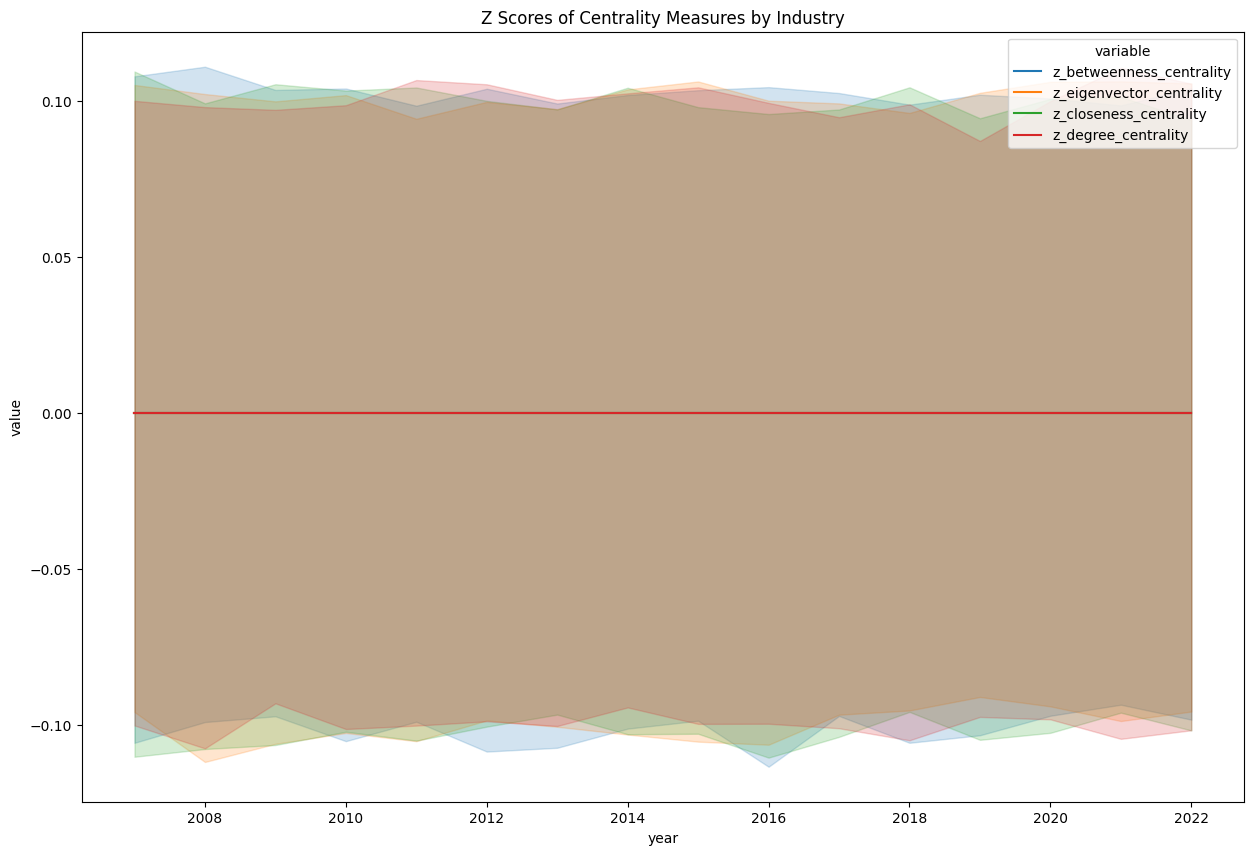

In [ ]:
import seaborn as sns
# group by industry and year and calculate z scores of centrality measures
eps = 1e-8
merged_df[['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality','z_roce','z_pe','z_de']] = \
    merged_df.groupby(['industry', 'year'])[['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality','roce','pe_op_basic','de_ratio']].transform(
        lambda x: (x - x.mean()) / (x.std() + eps))

# plot the z scores of centrality measures by industry
industry_df = merged_df.melt(id_vars=['industry', 'year'],
                             value_vars=['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality'],
                             var_name='variable', value_name='value')

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year', y='value', hue='variable', data=industry_df)
plt.title('Z Scores of Centrality Measures by Industry')
plt.show()


In [ ]:
# Group the data by industry
groups = merged_df.groupby('industry')

# # Loop through the groups and create scatterplots
# for name, group in groups:
#     plt.figure()
#     sns.pairplot(data=group, x_vars=['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality'], y_vars=['mktcap'], kind='scatter')
#     plt.title("Centrality z-scores vs Mktcap within "  + name )
#     plt.show()

In [ ]:
# Calculate summary statistics for each industry
summary_stats = merged_df.groupby('industry')[['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']].describe()

# Display the summary statistics
print(summary_stats)

                                                   z_betweenness_centrality  \
                                                                      count   
industry                                                                      
Finance, Insurance, And Real Estate                                    79.0   
Manufacturing                                                         264.0   
Mining                                                                  6.0   
Retail Trade                                                           56.0   
Services                                                               48.0   
Transportation, Communications, Electric, Gas, ...                     22.0   
Wholesale Trade                                                         2.0   

                                                                            \
                                                            mean       std   
industry                                             

Similarities:

- Variation: Most industries show a certain level of variation in their centrality scores, as indicated by the standard deviation (std) values. This suggests that centrality scores are not uniform within industries and can vary across entities within the same industry.
- Range: The minimum and maximum values of centrality scores vary among industries, but all industries have a maximum value less than or equal to 1. This indicates that no industry has entities with extremely high centrality scores compared to others.

Differences:

- Mean Centrality: The mean centrality scores (mean column) differ among industries, suggesting variations in the overall centrality of entities within each industry. For example, *the Finance, Insurance, and Real Estate industry have a mean z_betweenness_centrality close to zero, while Wholesale Trade has a mean close to -1.05.* This implies differences in the importance and influence of entities within these industries.
- Standard Deviation: The standard deviation (std column) also differs among industries. *Industries like Mining and Wholesale Trade have lower standard deviations, indicating less variation in centrality scores, while industries like Manufacturing and Finance, Insurance, and Real Estate have higher standard deviations, indicating more variation in centrality scores.* This suggests that centrality scores are more consistent within Mining and Wholesale Trade, while they vary more widely within Manufacturing and Finance, Insurance, and Real Estate.
- Median Centrality: The median centrality scores (50% column) show variations among industries. For example, *Manufacturing has a median close to -0.21, indicating that about 50% of entities in the Manufacturing industry have a centrality score below this value. In contrast, Mining has a median close to zero, indicating a more balanced distribution of centrality scores.* These differences suggest variations in the importance and influence of entities within different industries.
- Quartiles: The values at the 25th percentile (25% column) and 75th percentile (75% column) also differ among industries. This indicates differences in the distribution of centrality scores within each industry. For example, the Retail Trade industry has a 25th percentile value close to -0.94 and a 75th percentile value close to 0.79, suggesting a wide range of centrality scores and potential variation in the importance of entities within the industry.

## Time Series Modeling by Industry

In [ ]:
merged_df['industry'] = merged_df['industry'].astype('category')
print(merged_df['industry'].dtypes)


category


In [ ]:
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y')

Text(0.5, 1.0, 'Average roa')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average roa')

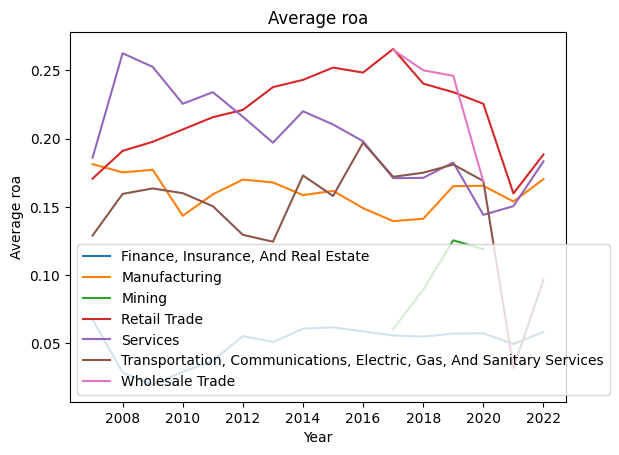

Text(0.5, 1.0, 'Average roe')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average roe')

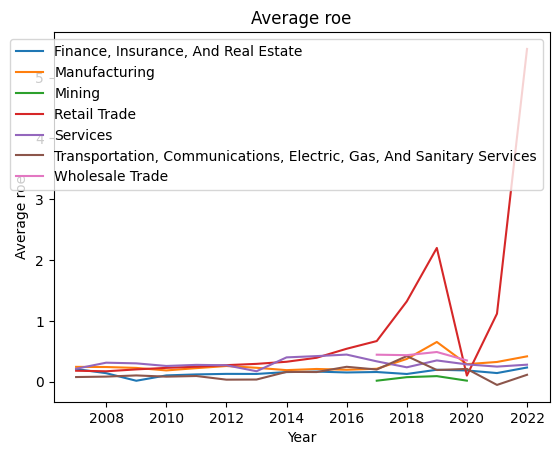

Text(0.5, 1.0, 'Average pe_op_basic')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average pe_op_basic')

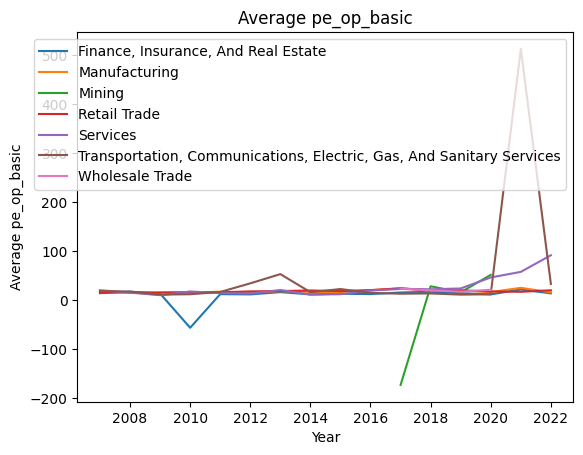

Text(0.5, 1.0, 'Average de_ratio')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average de_ratio')

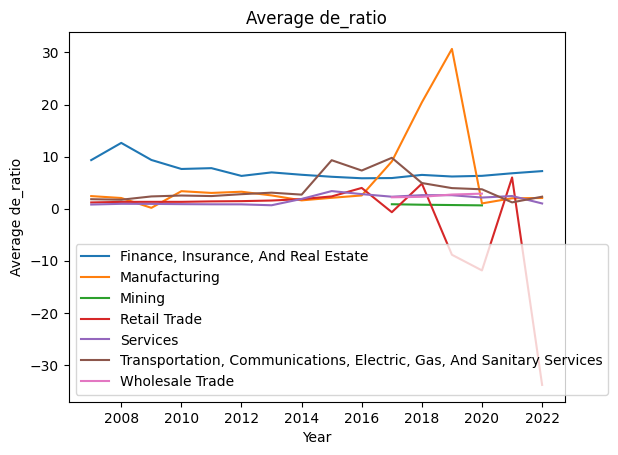

Text(0.5, 1.0, 'Average roce')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average roce')

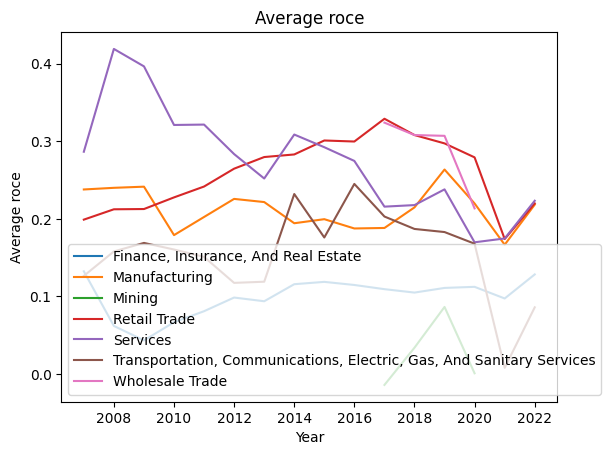

Text(0.5, 1.0, 'Average z_betweenness_centrality')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average z_betweenness_centrality')

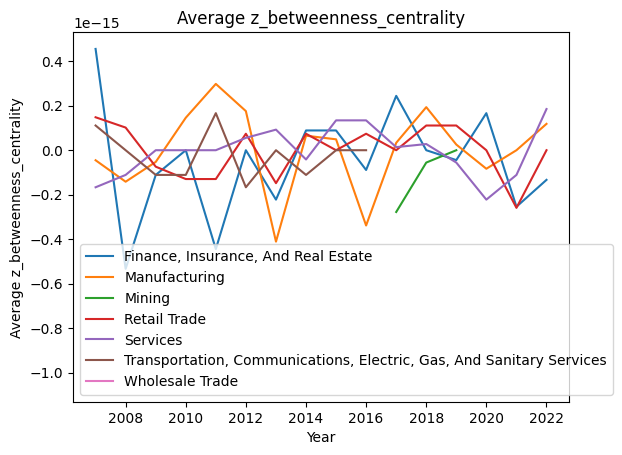

Text(0.5, 1.0, 'Average z_eigenvector_centrality')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average z_eigenvector_centrality')

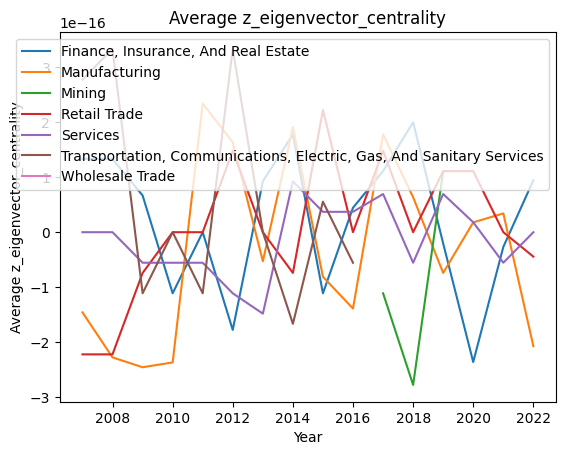

Text(0.5, 1.0, 'Average z_closeness_centrality')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average z_closeness_centrality')

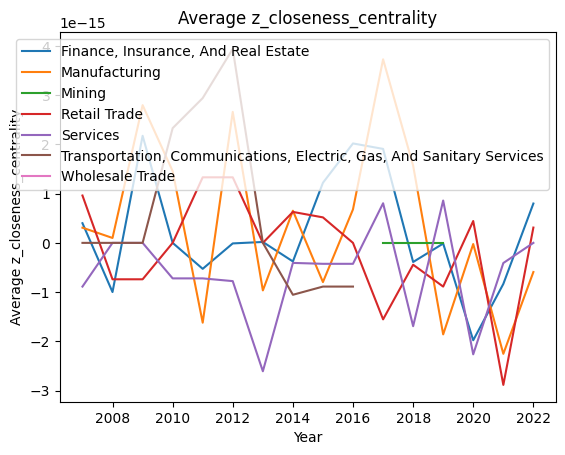

Text(0.5, 1.0, 'Average z_degree_centrality')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average z_degree_centrality')

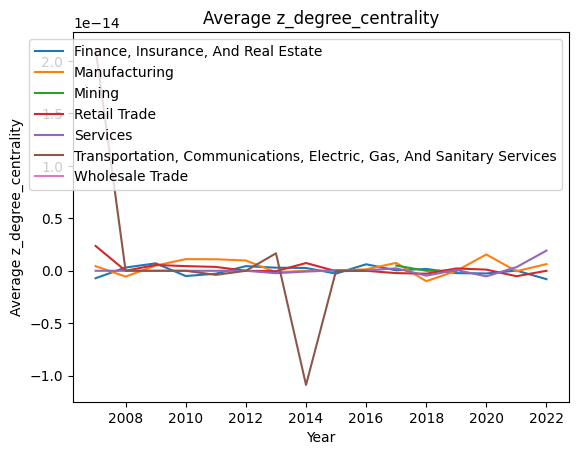

In [ ]:
financial_metrics = ['roa', 'roe', 'pe_op_basic', 'de_ratio', 'roce']
centrality_scores = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']

# Calculate the average for each industry for each year
averages = merged_df.groupby(['industry', 'year'])[financial_metrics + centrality_scores].mean().reset_index()

for metric in financial_metrics:
    # Plot the average time series for financial metric
    grouped = averages.groupby('industry')
    for industry, group in grouped:
        plt.plot(group['year'], group[metric], label=industry)
    plt.legend()
    plt.title(f"Average {metric}")
    plt.xlabel('Year')
    plt.ylabel(f"Average {metric}")
    plt.show()

for score in centrality_scores:
    # Plot the average time series for centrality score
    grouped = averages.groupby('industry')
    for industry, group in grouped:
        plt.plot(group['year'], group[score], label=industry)
    plt.legend()
    plt.title(f"Average {score}")
    plt.xlabel('Year')
    plt.ylabel(f"Average {score}")
    plt.show()


### z_betweenness_centrality on roa

In [ ]:
import statsmodels.api as sm
import numpy as np

financial_metrics = ['roa']
centrality_score = 'z_betweenness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()


Industry: Manufacturing, Centrality Score: z_betweenness_centrality

Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.328
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.250
Time:                        03:50:33   Log-Likelihood:                 341.09
No. Observations:                 264   AIC:                            -678.2
Df Residuals:                     262   BIC:                            -671.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn(

Analysis:
- In some industries like Finance, Insurance, and Real Estate and Services, higher centrality scores are associated with lower ROA. However, in other industries like Manufacturing and Mining, the centrality scores do not show a significant relationship with ROA.

### z_betweenness_centrality on roe

In [ ]:
financial_metrics = ['roe']
centrality_score = 'z_betweenness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()


Industry: Manufacturing, Centrality Score: z_betweenness_centrality

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "




Financial Metric: roe
                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.91
Date:                Wed, 31 May 2023   Prob (F-statistic):           8.61e-05
Time:                        03:50:33   Log-Likelihood:                -130.98
No. Observations:                 264   AIC:                             266.0
Df Residuals:                     262   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Analysis:

- In summary, the degree centrality score shows a significant positive relationship with ROE in the Manufacturing industry, while no significant relationship is observed in other industries.

### z_betweenness_centrality on PE

In [ ]:
financial_metrics = ['pe_op_basic']
centrality_score = 'z_betweenness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()


Industry: Manufacturing, Centrality Score: z_betweenness_centrality

Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.023
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.313
Time:                        03:50:33   Log-Likelihood:                -974.36
No. Observations:                 264   AIC:                             1953.
Df Residuals:                     262   BIC:                             1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                  0.003622
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.952
Time:                        03:50:33   Log-Likelihood:                -394.60
No. Observations:                  79   AIC:                             793.2
Df Residuals:                      77   BIC:                             797.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### z_betweenness_centrality on DE ratio

In [ ]:
financial_metrics = ['de_ratio']
centrality_score = 'z_betweenness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_betweenness_centrality

Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.767
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0170
Time:                        03:50:33   Log-Likelihood:                -1245.7
No. Observations:                 264   AIC:                             2495.
Df Residuals:                     262   BIC:                             2503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     28.01
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.11e-06
Time:                        03:50:33   Log-Likelihood:                -205.86
No. Observations:                  79   AIC:                             415.7
Df Residuals:                      77   BIC:                             420.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

In summary, based on the provided regression results, there is no conclusive evidence of a significant relationship between the betweenness centrality score and the PE ratio in any of the analyzed industries.

### z_betweenness_centrality on ROCE

In [ ]:
financial_metrics = ['roce']
centrality_score = 'z_betweenness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_betweenness_centrality

Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     16.58
Date:                Wed, 31 May 2023   Prob (F-statistic):           6.17e-05
Time:                        03:50:33   Log-Likelihood:                 193.89
No. Observations:                 264   AIC:                            -383.8
Df Residuals:                     262   BIC:                            -376.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)


                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.597
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0642
Time:                        03:50:33   Log-Likelihood:                 28.330
No. Observations:                  48   AIC:                            -52.66
Df Residuals:                      46   BIC:                            -48.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


These findings suggest that in the manufacturing industry, there is a positive relationship between betweenness centrality and roce. However, in the finance, insurance, and real estate industry, as well as the retail trade industry, there is a negative relationship between betweenness centrality and roce.

### z_eigenvector_centrality on ROA

In [ ]:
financial_metrics = ['roa']
centrality_score = 'z_eigenvector_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_eigenvector_centrality

Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     25.17
Date:                Wed, 31 May 2023   Prob (F-statistic):           9.72e-07
Time:                        03:50:34   Log-Likelihood:                 352.52
No. Observations:                 264   AIC:                            -701.0
Df Residuals:                     262   BIC:                            -693.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.242
Method:                 Least Squares   F-statistic:                   0.02478
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.883
Time:                        03:50:34   Log-Likelihood:                 13.042
No. Observations:                   6   AIC:                            -22.08
Df Residuals:                       4   BIC:                            -22.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Negative Correlation:
- Manufacturing
- Finance, Insurance, and Real Estate
- Services
- Retail Trade


### z_eigenvector_centrality on ROE

In [ ]:
financial_metrics = ['roe']
centrality_score = 'z_eigenvector_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_eigenvector_centrality

Financial Metric: roe
                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01816
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.893
Time:                        03:50:34   Log-Likelihood:                -138.76
No. Observations:                 264   AIC:                             281.5
Df Residuals:                     262   BIC:                             288.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "



                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.581
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0377
Time:                        03:50:34   Log-Likelihood:                 9.6070
No. Observations:                  48   AIC:                            -15.21
Df Residuals:                      46   BIC:                            -11.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                  

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Positive Correlation:
- Services
- Retail Trade


### z_eigenvector_centrality on PE

In [ ]:
financial_metrics = ['pe_op_basic']
centrality_score = 'z_eigenvector_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_eigenvector_centrality

Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.239
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0730
Time:                        03:50:34   Log-Likelihood:                -973.25
No. Observations:                 264   AIC:                             1950.
Df Residuals:                     262   BIC:                             1958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8492
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.361
Time:                        03:50:34   Log-Likelihood:                -208.43
No. Observations:                  56   AIC:                             420.9
Df Residuals:                      54   BIC:                             424.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Positive correlation
- Manufacturing industry


### z_eigenvector_centrality on DE

In [ ]:
financial_metrics = ['de_ratio']
centrality_score = 'z_eigenvector_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_eigenvector_centrality

Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.155
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.284
Time:                        03:50:34   Log-Likelihood:                -1248.0
No. Observations:                 264   AIC:                             2500.
Df Residuals:                     262   BIC:                             2507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "




--------------------------------------------------

Industry: Transportation, Communications, Electric, Gas, And Sanitary Services, Centrality Score: z_eigenvector_centrality

Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.661
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0119
Time:                        03:50:34   Log-Likelihood:                -58.698
No. Observations:                  22   AIC:                             121.4
Df Residuals:                      20   BIC:                             123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
     

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Positive correlation
- Finance, Insurance, and Real Estate
- Services


### z_eigenvector_centrality on ROCE

In [ ]:
financial_metrics = ['roce']
centrality_score = 'z_eigenvector_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_eigenvector_centrality

Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.163
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.282
Time:                        03:50:34   Log-Likelihood:                 186.38
No. Observations:                 264   AIC:                            -368.8
Df Residuals:                     262   BIC:                            -361.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.6120
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.478
Time:                        03:50:34   Log-Likelihood:                 10.603
No. Observations:                   6   AIC:                            -17.21
Df Residuals:                       4   BIC:                            -17.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Positive Correlation:
- Finance, Insurance, And Real Estate
- Retail Trade
- Transportation, Communications, Electric, Gas, And Sanitary Services

Negative Correlation
- Manufacturing
- Services
- Mining
- Wholesale Trade


### z_closeness_centrality on ROA

In [ ]:
financial_metrics = ['roa']
centrality_score = 'z_closeness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_closeness_centrality

Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     10.57
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00130
Time:                        03:50:35   Log-Likelihood:                 345.64
No. Observations:                 264   AIC:                            -687.3
Df Residuals:                     262   BIC:                            -680.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.242
Method:                 Least Squares   F-statistic:                   0.02478
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.883
Time:                        03:50:35   Log-Likelihood:                 13.042
No. Observations:                   6   AIC:                            -22.08
Df Residuals:                       4   BIC:                            -22.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs


Negative correlation
- Manufacturing
- Finance, Insurance, and Real Estate
Services
- Retail Trade
- Transportation, Communications, Electric, Gas, and Sanitary Services


### z_closeness_centrality on ROE

In [ ]:
financial_metrics = ['roe']
centrality_score = 'z_closeness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_closeness_centrality

Financial Metric: roe
                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.512
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00655
Time:                        03:50:35   Log-Likelihood:                -135.04
No. Observations:                 264   AIC:                             274.1
Df Residuals:                     262   BIC:                             281.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn(

                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.7705
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.430
Time:                        03:50:35   Log-Likelihood:                 11.947
No. Observations:                   6   AIC:                            -19.89
Df Residuals:                       4   BIC:                            -20.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### z_closeness_centrality on PE

In [ ]:
financial_metrics = ['pe_op_basic']
centrality_score = 'z_closeness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_closeness_centrality

Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008597
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.926
Time:                        03:50:35   Log-Likelihood:                -974.87
No. Observations:                 264   AIC:                             1954.
Df Residuals:                     262   BIC:                             1961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7155
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.400
Time:                        03:50:35   Log-Likelihood:                -394.23
No. Observations:                  79   AIC:                             792.5
Df Residuals:                      77   BIC:                             797.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
 


                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1454
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.704
Time:                        03:50:35   Log-Likelihood:                -208.79
No. Observations:                  56   AIC:                             421.6
Df Residuals:                      54   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     1

### z_closeness_centrality on DE

In [ ]:
financial_metrics = ['de_ratio']
centrality_score = 'z_closeness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_closeness_centrality

Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.001
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0262
Time:                        03:50:35   Log-Likelihood:                -1246.1
No. Observations:                 264   AIC:                             2496.
Df Residuals:                     262   BIC:                             2503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     30.25
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.61e-06
Time:                        03:50:35   Log-Likelihood:                -91.461
No. Observations:                  48   AIC:                             186.9
Df Residuals:                      46   BIC:                             190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
c

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5495
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.462
Time:                        03:50:35   Log-Likelihood:                -256.81
No. Observations:                  56   AIC:                             517.6
Df Residuals:                      54   BIC:                             521.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

Positive correlation
- Finance, Insurance, And Real Estate
- Services

Negative correlation
- Manufacturing
- Retail Trade
- Transportation, Communications, Electric, Gas, And Sanitary Services


### z_closeness_centrality on ROCE

In [ ]:
financial_metrics = ['roce']
centrality_score = 'z_closeness_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_closeness_centrality

Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.520
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0195
Time:                        03:50:35   Log-Likelihood:                 188.54
No. Observations:                 264   AIC:                            -373.1
Df Residuals:                     262   BIC:                            -365.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                 -0.084
Method:                 Least Squares   F-statistic:                    0.6120
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.478
Time:                        03:50:35   Log-Likelihood:                 10.603
No. Observations:                   6   AIC:                            -17.21
Df Residuals:                       4   BIC:                            -17.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     8.972
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00715
Time:                        03:50:35   Log-Likelihood:                 34.504
No. Observations:                  22   AIC:                            -65.01
Df Residuals:                      20   BIC:                            -62.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### z_degree_centrality on ROA


In [ ]:
financial_metrics = ['roa']
centrality_score = 'z_degree_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_degree_centrality

Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     16.41
Date:                Wed, 31 May 2023   Prob (F-statistic):           6.73e-05
Time:                        03:50:36   Log-Likelihood:                 348.44
No. Observations:                 264   AIC:                            -692.9
Df Residuals:                     262   BIC:                            -685.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "




Financial Metric: roa
                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 31 May 2023   Prob (F-statistic):                nan
Time:                        03:50:36   Log-Likelihood:                 71.537
No. Observations:                   2   AIC:                            -139.1
Df Residuals:                       0   BIC:                            -141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### z_degree_centrality on ROE


In [ ]:
financial_metrics = ['roe']
centrality_score = 'z_degree_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_degree_centrality

Financial Metric: roe
                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.830
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0288
Time:                        03:50:36   Log-Likelihood:                -136.36
No. Observations:                 264   AIC:                             276.7
Df Residuals:                     262   BIC:                             283.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                    roe   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.347
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.251
Time:                        03:50:36   Log-Likelihood:                -153.44
No. Observations:                  56   AIC:                             310.9
Df Residuals:                      54   BIC:                             314.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0563    

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Positive correlation
- manufacturing


### z_degree_centrality on PE

In [ ]:
financial_metrics = ['pe_op_basic']
centrality_score = 'z_degree_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_degree_centrality

Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.295
Time:                        03:50:36   Log-Likelihood:                -974.32
No. Observations:                 264   AIC:                             1953.
Df Residuals:                     262   BIC:                             1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: pe_op_basic
                            OLS Regression Results                            
Dep. Variable:            pe_op_basic   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.997
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0515
Time:                        03:50:36   Log-Likelihood:                -237.30
No. Observations:                  48   AIC:                             478.6
Df Residuals:                      46   BIC:                             482.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs

Positive
- Manufacturing
- Services


### z_degree_centrality on DE

In [ ]:
financial_metrics = ['de_ratio']
centrality_score = 'z_degree_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_degree_centrality

Financial Metric: de_ratio
                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.437
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0361
Time:                        03:50:36   Log-Likelihood:                -1246.4
No. Observations:                 264   AIC:                             2497.
Df Residuals:                     262   BIC:                             2504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "



                            OLS Regression Results                            
Dep. Variable:               de_ratio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 31 May 2023   Prob (F-statistic):                nan
Time:                        03:50:36   Log-Likelihood:                 65.991
No. Observations:                   2   AIC:                            -128.0
Df Residuals:                       0   BIC:                            -130.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.8900   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Positive correlation
- Manufacturing
- Finance, Insurance, And Real Estate
- Services

Negative correlation
- Mining
- Retail Trade
- Transportation, Communications, Electric, Gas, And Sanitary Services


### z_degree_centrality on ROCE

In [ ]:
financial_metrics = ['roce']
centrality_score = 'z_degree_centrality'

# Fit regression model for each industry and the selected centrality score
for industry in merged_df['industry'].unique():
    industry_df = merged_df[merged_df['industry'] == industry]

    print(f"Industry: {industry}, Centrality Score: {centrality_score}")
    print()

    # Iterate over financial metrics
    for metric in financial_metrics:
        X = industry_df[centrality_score]  # Independent variable (centrality score)
        y = industry_df[metric]  # Dependent variable (financial metric)

        # Preprocess data
        valid_data_mask = np.isfinite(X) & np.isfinite(y)  # Filter out infinite and missing values
        X = X[valid_data_mask]
        y = y[valid_data_mask]

        # Add a constant term to the independent variable
        X = sm.add_constant(X)

        # Fit the regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Print model summary
        print(f"Financial Metric: {metric}")
        print(results.summary())
        print()

    print('-' * 50)
    print()

Industry: Manufacturing, Centrality Score: z_degree_centrality

Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5895
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.443
Time:                        03:50:36   Log-Likelihood:                 186.09
No. Observations:                 264   AIC:                            -368.2
Df Residuals:                     262   BIC:                            -361.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "




Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.733
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0595
Time:                        03:50:36   Log-Likelihood:                 28.395
No. Observations:                  48   AIC:                            -52.79
Df Residuals:                      46   BIC:                            -49.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const    

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Financial Metric: roce
                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 31 May 2023   Prob (F-statistic):                nan
Time:                        03:50:37   Log-Likelihood:                 71.106
No. Observations:                   2   AIC:                            -138.2
Df Residuals:                       0   BIC:                            -140.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Positive
- Manufacturing

Negative
- Finance, Insurance, and Real Estate
- Services
- Retail Trade
- Transportation, Communications, Electric, Gas, and Sanitary Services


In [ ]:
mergedd_df

NameError: ignored

## Lagged Diversity Effects & OLS on Diversity Score

In [ ]:
# Group by 'company' and then shift the 'year' column down by 1
diversity_df['lagged_year'] = diversity_df.groupby('ticker')['year'].shift(1)
diversity_df.drop(columns=['year'], inplace=True)
diversity_df.rename(columns={'lagged_year': 'year'}, inplace=True)

In [ ]:
# merge lagged diversity measures with stock_df
lagged_merged_df2 = stock_df.merge(diversity_df, on = ['year', 'ticker'], how = 'left')
lagged_merged_df2 = lagged_merged_df2.dropna(subset=['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives'])

In [ ]:
# maintain contemporaneous variables only
lagged_merged_df2 = lagged_merged_df2[lagged_merged_df2['year'] >= 2017]

# for each ticker, keep the row for each year that has a qdate in December
lagged_merged_df2 = lagged_merged_df2.sort_values(['ticker', 'year', 'qdate'])
lagged_merged_df2 = lagged_merged_df2.groupby(['ticker', 'year']).tail(1)

# fill missing values with 0
lagged_merged_df2 = lagged_merged_df2.fillna(0)

In [ ]:
# Create variables for OLS
lagged_X = lagged_merged_df2[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']]
lagged_X = sm.add_constant(lagged_X)
lagged_y_pe = lagged_merged_df2['pe_op_basic']
lagged_y_roa = lagged_merged_df2['roa']
lagged_y_de = lagged_merged_df2['de_ratio']
lagged_y_roce = lagged_merged_df2['roce']

# Regress lagged centralities on return on asset
lagged_model_pe = sm.OLS(lagged_y_pe, lagged_X).fit()
print(lagged_model_pe.summary())

Overall, based on the provided results, there is little evidence to support a significant relationship between the independent variables ('gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives') and the dependent variable 'pe_op_basic'.

In [ ]:
# Regress lagged centralities on return on asset
lagged_model_roa = sm.OLS(lagged_y_roa, lagged_X).fit()
print(lagged_model_roa.summary())

the variables that appear to be statistically significant at a significance level of 0.05 are:

1. age_mean: The coefficient estimate of -0.0102 is statistically significant (p-value < 0.05), suggesting that there is a significant relationship between the average age and the dependent variable "roa" (return on assets).
2. ethnicity_hhi: The coefficient estimate of -0.1084 is statistically significant (p-value < 0.05), indicating a significant relationship between ethnicity heterogeneity and "roa".
3. num_board_cohorts: The coefficient estimate of 0.0295 is statistically significant (p-value < 0.05), suggesting a significant relationship between the number of board cohorts and "roa".

In [ ]:
# Regress lagged centralities on return on equity
lagged_model_de = sm.OLS(lagged_y_de, lagged_X).fit()
print(lagged_model_de.summary())

 none of the variables appear to be statistically significant at the 0.05 significance level. The p-values for all the coefficients are greater than 0.05, indicating that there is no significant relationship between these variables and the dependent variable "de_ratio" (debt-to-equity ratio).

I*t's important to note that the p-values for "num_age_cohorts" and "ethnicity_hhi" are relatively close to the 0.05 threshold* (p-values of 0.035 and 0.073, respectively), suggesting a potential weak relationship that might be worth further investigation or consideration.

In [ ]:
# Regress lagged centralities on return on equity
lagged_model_roce = sm.OLS(lagged_y_roce, lagged_X).fit()
print(lagged_model_roce.summary())

*However, it's important to note that the p-values for "age_mean" and "age_range" are relatively close to the 0.05 threshold (p-values of 0.037 and 0.054, respectively), suggesting a potential weak relationship that might be worth further investigation or consideration.*

## Panel Data Regression - Diversity

In [ ]:
# Set up panel data using lagged_merged_df
panel_data = lagged_merged_df2[['ticker', 'year', 'pe_op_basic', 'roa', 'de_ratio',  'roce', 'roe', 'gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']]
panel_data['year'] = pd.to_datetime(panel_data['year'], format='%Y')
panel_data = panel_data.set_index(['ticker', 'year'])
panel_data = panel_data.groupby([pd.Grouper(level='ticker'), pd.Grouper(freq='Y', level='year')]).mean()
panel_data = panel_data.reset_index()
panel_data['year'] = panel_data['year'].dt.year
panel_data = panel_data.set_index(['ticker', 'year'])

# Regress lagged diversities on return on asset
fe_model = PanelOLS(panel_data['roa'], panel_data[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']], entity_effects=True)
fe_result = fe_model.fit()
print(fe_result)

none of the variables appear to be statistically significant at the 0.05 significance level. The p-values for all the coefficients are greater than 0.05, indicating that there is no significant relationship between these variables and the dependent variable "roa" (return on assets).

In [ ]:
# Regress lagged diversities on return on equity
re_model = RandomEffects(panel_data['roe'], panel_data[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']])
re_result = re_model.fit()
print(re_result)

none of the variables appear to be statistically significant at the 0.05 significance level. The p-values for all the coefficients are greater than 0.05, indicating that there is no significant relationship between these variables and the dependent variable "roe" (return on equity).

In [ ]:
# Regress lagged diversities on price to earning ratio
pe_op_basic_model = RandomEffects(panel_data['pe_op_basic'], panel_data[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']])
pe_op_basic_result = pe_op_basic_model.fit()
print(pe_op_basic_result)

none of the variables appear to be statistically significant at the 0.05 significance level. The p-values for all the coefficients are greater than 0.05, indicating that there is no significant relationship between these variables and the dependent variable "pe_op_basic" (price-to-earnings ratio based on basic earnings).

In [ ]:
# Regress lagged diversities on debt to earning ratio
de_model = RandomEffects(panel_data['de_ratio'], panel_data[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']])
de_result = de_model.fit()
print(de_result)

1. The coefficient for "age_mean" is -1.8294 with a standard error of 0.7440. This variable is statistically significant at the 0.05 significance level (p-value = 0.0152), suggesting a negative relationship between the average age and the debt-to-equity ratio.
2. The coefficient for "age_entropy" is 39.107 with a standard error of 17.680. This variable is statistically significant at the 0.05 significance level (p-value = 0.0286), indicating a positive relationship between the age entropy and the debt-to-equity ratio.

None of the other variables ("gender_diversity," "age_range," "num_age_cohorts," "age_std_distribution," "ethnicity_hhi," "former_emp_diversity," "num_board_cohorts," "relatives") are statistically significant at the 0.05 significance level. Their p-values are all greater than 0.05.

In [ ]:
# Regress lagged diversities on Return on Capital Employed
roce_model = RandomEffects(panel_data['roce'], panel_data[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives']])
roce_result = roce_model.fit()
print(roce_result)

1. The coefficient for "age_mean" is -0.0068 with a standard error of 0.0028. This variable is statistically significant at the 0.05 significance level (p-value = 0.0162), suggesting a negative relationship between the average age and the return on capital employed.
2. The coefficient for "age_entropy" is 0.1665 with a standard error of 0.0696. This variable is statistically significant at the 0.05 significance level (p-value = 0.0181), indicating a positive relationship between the age entropy and the return on capital employed.
3. The coefficient for "age_range" is -0.0089 with a standard error of 0.0045. This variable is not statistically significant at the 0.05 significance level (p-value = 0.0519), although it is close to the threshold.

None of the other variables ("gender_diversity," "num_age_cohorts," "age_std_distribution," "ethnicity_hhi," "former_emp_diversity," "num_board_cohorts," "relatives") are statistically significant at the 0.05 significance level. Their p-values are all greater than 0.05.

## Z-Scores Of Diversity by Industry

In [ ]:
list(merged_df)

In [ ]:
import seaborn as sns
# group by industry and year and calculate z scores of centrality measures
eps = 1e-8
merged_df[['z_gender_diversity', 'z_age_mean', 'z_age_range', 'z_num_age_cohorts', 'z_age_entropy', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_former_emp_diversity', 'z_num_board_cohorts', 'z_relatives']] = \
    merged_df.groupby(['industry', 'year'])[['gender_diversity', 'age_mean', 'age_range', 'num_age_cohorts', 'age_entropy', 'age_std_distribution', 'ethnicity_hhi', 'former_emp_diversity', 'num_board_cohorts', 'relatives' ]].transform(
        lambda x: (x - x.mean()) / (x.std() + eps))



<Axes: xlabel='year', ylabel='value'>

Text(0.5, 1.0, 'Z Scores of Diversity Measures by Industry')

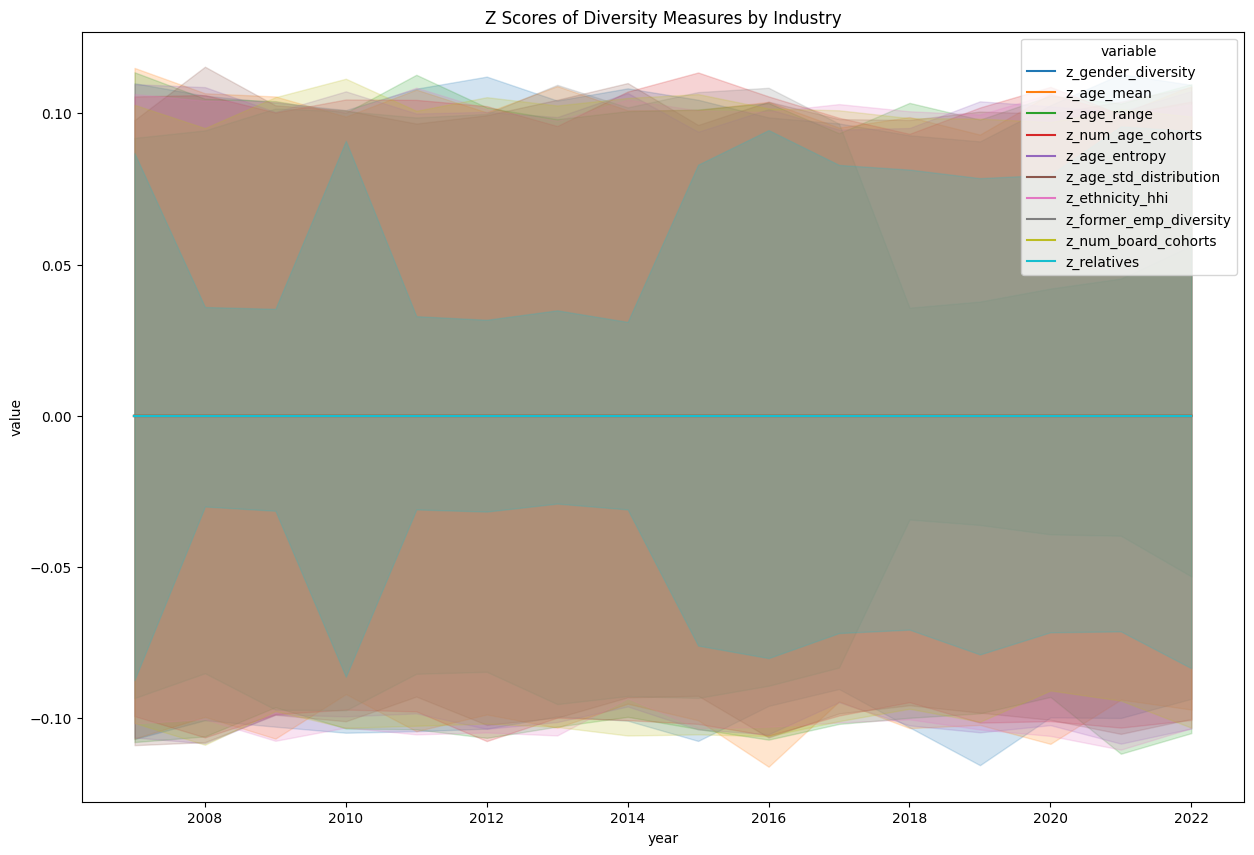

In [ ]:
# plot the z scores of centrality measures by industry
industry_df = merged_df.melt(id_vars=['industry', 'year'],
                             value_vars=['z_gender_diversity', 'z_age_mean', 'z_age_range', 'z_num_age_cohorts', 'z_age_entropy', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_former_emp_diversity', 'z_num_board_cohorts', 'z_relatives'],
                             var_name='variable', value_name='value')

fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year', y='value', hue='variable', data=industry_df)
plt.title('Z Scores of Diversity Measures by Industry')
plt.show()


In [ ]:
# Group the data by industry
groups = merged_df.groupby('industry')

# Loop through the groups and create scatterplots
for name, group in groups:
    plt.figure()
    sns.pairplot(data=group, x_vars=['z_gender_diversity', 'z_age_mean', 'z_age_range', 'z_num_age_cohorts', 'z_age_entropy', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_former_emp_diversity', 'z_num_board_cohorts', 'z_relatives'], y_vars=['mktcap'], kind='scatter')
    plt.title("Diversity z-scores vs Mktcap within "  + name )
    plt.show()

## PCA of Diversity Score

## Z-Scores for ROE, ROA

In [ ]:
# Calculate z-scores for ROE and ROA
merged_df[['z_roe', 'z_roa']] = merged_df.groupby(['industry', 'year'])[['roe', 'roa']].transform(
    lambda x: (x - x.mean()) / (x.std() + 1e-8))


# # create a list of unique industries in the merged_df dataframe
# unique_industries = merged_df['industry'].unique()

# # iterate over each unique industry and create a FacetGrid with one plot for each ticker
# for industry in unique_industries:
#     # filter data for the current industry
#     industry_df = merged_df[merged_df['industry'] == industry]

#     # create a FacetGrid with one plot for each ticker
#     g = sns.FacetGrid(industry_df, col='ticker', col_wrap=5, height=3, aspect=1.5)

#     # plot z-score of ROE over time for each ticker
#     g.map(plt.plot, 'year', 'z_roe')

#     # set plot title and labels
#     g.fig.suptitle(f'Z Scores of ROE by Ticker within {industry} Industry', fontsize=16)
#     g.set_axis_labels('Year', 'Z Score of ROE')


#     # show the plot
#     plt.show()


In [ ]:
merged_df.head()

ticker public_date       industry   siccd    prc  betweenness_centrality  \
113     AA  05/31/2007  Manufacturing  3334.0  41.28                0.003201   
141     AA  06/30/2007  Manufacturing  3334.0  40.53                0.003201   
169     AA  07/31/2007  Manufacturing  3334.0  38.20                0.003201   
197     AA  08/31/2007  Manufacturing  3334.0  36.53                0.003201   
225     AA  09/30/2007  Manufacturing  3334.0  39.12                0.003201   

     eigenvector_centrality  closeness_centrality  degree_centrality    roa  \
113                0.052698              0.355574           0.036246  0.154   
141                0.052698              0.355574           0.036246  0.154   
169                0.052698              0.355574           0.036246  0.154   
197                0.052698              0.355574           0.036246  0.148   
225                0.052698              0.355574           0.036246  0.148   

       roe  pe_op_basic  de_ratio   roce     cusip  unnamed: 0   gvkey  \
113  0.146       43.000     1.375  0.195  01381710        7606  1356.0   
141  0.146       42.219     1.375  0.195  01381710        7635  1356.0   
169  0.146       39.792     1.375  0.195  01381710        7664  1356.0   
197  0.141       38.588     1.341  0.188  01381710        7693  1356.0   
225  0.141       41.324     1.341  0.188  01381710        7722  1356.0   

      permno       adate       qdate  year   capei     bm    evm  pe_op_dil  \
113  24643.0  12/31/2006  03/31/2007  2007  28.956  0.548  6.558     43.453   
141  24643.0  12/31/2006  03/31/2007  2007  28.430  0.548  6.558     42.663   
169  24643.0  12/31/2006  03/31/2007  2007  27.243  0.548  6.558     40.211   
197  24643.0  12/31/2006  06/30/2007  2007  24.501  0.497  7.053     39.000   
225  24643.0  12/31/2006  06/30/2007  2007  26.238  0.497  7.053     41.765   

     pe_exi  pe_inc     ps     pcf    dpr    npm  opmbd  opmad    gpm   ptpm  \
113  48.949  47.267  1.151  10.854  0.245  0.071  0.178  0.137  0.230  0.114   
141  48.059  46.408  1.130  10.657  0.245  0.071  0.178  0.137  0.230  0.114   
169  45.296  43.740  1.083  10.212  0.245  0.071  0.178  0.137  0.230  0.114   
197  44.012  42.477  1.027   8.161  0.257  0.070  0.174  0.133  0.225  0.112   
225  47.133  45.488  1.100   8.740  0.257  0.070  0.174  0.133  0.225  0.112   

       cfm  efftax  aftret_eq  aftret_invcapx  aftret_equity  pretret_noa  \
113  0.112   0.243      0.154           0.151          0.154        0.274   
141  0.112   0.243      0.154           0.151          0.154        0.274   
169  0.112   0.243      0.154           0.151          0.154        0.274   
197  0.110   0.243      0.148           0.146          0.148        0.258   
225  0.110   0.243      0.148           0.146          0.148        0.258   

     pretret_earnat  gprof  equity_invcap  debt_invcap  totdebt_invcap  \
113           0.179  0.194          0.672        0.249           0.347   
141           0.179  0.194          0.672        0.249           0.347   
169           0.179  0.194          0.672        0.249           0.347   
197           0.173  0.187          0.668        0.249           0.335   
225           0.173  0.187          0.668        0.249           0.335   

     capital_ratio  int_debt  int_totdebt  cash_lt  invt_act  rect_act  \
113          0.269     0.078        0.056    0.024     0.414     0.393   
141          0.269     0.078        0.056    0.024     0.414     0.393   
169          0.269     0.078        0.056    0.024     0.414     0.393   
197          0.271     0.081        0.060    0.032     0.401     0.384   
225          0.271     0.081        0.060    0.032     0.401     0.384   

     debt_at  debt_ebitda  short_debt  curr_debt  lt_debt  profit_lct  \
113    0.206        1.373       0.282      0.391    0.268       0.696   
141    0.206        1.373       0.282      0.391    0.268       0.696   
169    0.206        1.373       0.282      0.391    0.268       0.696   
19

# Alpha Plots

### working code

In [ ]:
merged_df.month.unique()

array([ 5,  6,  7,  8,  9, 10,  1, 11, 12,  2,  3,  4])

In [ ]:
merged_df['avg_centrality'] = merged_df[['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']].mean(axis=1)

In [ ]:
merged_df['public_date'] = pd.to_datetime(merged_df['public_date'])

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objects as go

# Initialize an empty DataFrame to store the combined results
combined_alpha = pd.DataFrame()

# Loop through each year from 2007 to 2018
for selected_year in range(2007, 2019):
    # Filter the data for December of the selected year
    dec_df = merged_df[(merged_df['month'] == 12) & (merged_df['year'] == selected_year)]
    start_date = pd.Timestamp(year=selected_year, month=12, day=1)
    end_date = pd.Timestamp(year=selected_year + 5, month=12, day=31)

    # Calculate the threshold value for the top 5% central companies based on the desired centrality measure
    centrality_measure = 'z_degree_centrality'  # take avg
    sub_sorted = dec_df.sort_values(centrality_measure)
    n = 3

    top_10_percent = sub_sorted.tail(n)
    bottom_10_percent = sub_sorted.head(n)
    top_10_percent_tickers = top_10_percent['ticker'].values
    bottom_10_percent_tickers = bottom_10_percent['ticker'].values

    # Initialize empty DataFrames to store forward returns for each ticker
    alpha = pd.DataFrame()

    # Loop through each ticker and calculate forward returns for top 5% centrality
    for ticker in top_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]  # add date start
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = 1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Loop through each ticker and calculate forward returns for bottom 5% centrality
    for ticker in bottom_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = -1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Append the results to the combined DataFrame
    combined_alpha = combined_alpha.append(alpha)

# Calculate the mean forward returns for each month across all years
glong = combined_alpha[combined_alpha['side'] == 1].groupby('month', as_index=False).mean()
gshort = combined_alpha[combined_alpha['side'] == -1].groupby('month', as_index=False).mean()

# Plotting the lines using Plotly Express
fig = px.line(glong, x='month', y='forward_return', color_discrete_sequence=['blue'])

# Manually add legend labels
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='blue'), name='most central companies'))

# Add the second line plot using Plotly Graph Objects
fig.add_scatter(x=gshort['month'], y=gshort['forward_return'], mode='lines', line=dict(color='red'),
                legendgroup='short', name='least central companies')

# Update the layout and title of the plot
fig.update_layout(title="Average Forward Returns for top 10% vs bottom 10% central(degree) companies (2008-2018)")

# Show the figure
fig.show()


In [ ]:
d.sort_values(by='ticker').head()

ticker public_date  forward_return  side  month
4257    TRV  2018-12-31        0.000000    -1      0
5016    TRV  2021-02-28        0.215031    -1     26
5045    TRV  2021-03-31        0.255950    -1     27
5074    TRV  2021-04-30        0.291524    -1     28
5103    TRV  2021-05-31        0.333612    -1     29

In [ ]:
import plotly.graph_objects as go

# Initialize an empty DataFrame to store the combined results
combined_alpha = pd.DataFrame()

# Loop through each year from 2007 to 2018
for selected_year in range(2007, 2019):
    # Filter the data for December of the selected year
    dec_df = merged_df[(merged_df['month'] == 12) & (merged_df['year'] == selected_year)]
    start_date = pd.Timestamp(year=selected_year, month=12, day=1)
    end_date = pd.Timestamp(year=selected_year + 5, month=12, day=31)

    # Calculate the threshold value for the top 5% central companies based on the desired centrality measure
    centrality_measure = 'z_closeness_centrality'  # take avg
    sub_sorted = dec_df.sort_values(centrality_measure)
    n = 3

    top_10_percent = sub_sorted.tail(3)
    bottom_10_percent = sub_sorted.head(3)
    top_10_percent_tickers = top_10_percent['ticker'].values
    bottom_10_percent_tickers = bottom_10_percent['ticker'].values

    # Initialize empty DataFrames to store forward returns for each ticker
    alpha = pd.DataFrame()

    # Loop through each ticker and calculate forward returns for top 5% centrality
    for ticker in top_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]  # add date start
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = 1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Loop through each ticker and calculate forward returns for bottom 5% centrality
    for ticker in bottom_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = -1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Append the results to the combined DataFrame
    combined_alpha = combined_alpha.append(alpha)

# Calculate the mean forward returns for each month across all years
glong = combined_alpha[combined_alpha['side'] == 1].groupby('month', as_index=False).mean()
gshort = combined_alpha[combined_alpha['side'] == -1].groupby('month', as_index=False).mean()

# Plotting the lines using Plotly Express
fig = px.line(glong, x='month', y='forward_return', color_discrete_sequence=['blue'])

# Manually add legend labels
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='blue'), name='most central companies'))

# Add the second line plot using Plotly Graph Objects
fig.add_scatter(x=gshort['month'], y=gshort['forward_return'], mode='lines', line=dict(color='red'),
                legendgroup='short', name='least central companies')

# Update the layout and title of the plot
fig.update_layout(title="Average Forward Returns for top 10% vs bottom 10% central(closeness) companies (2008-2018)")


In [ ]:

import plotly.graph_objects as go

# Initialize an empty DataFrame to store the combined results
combined_alpha = pd.DataFrame()

# Loop through each year from 2007 to 2018
for selected_year in range(2007, 2019):
    # Filter the data for December of the selected year
    dec_df = merged_df[(merged_df['month'] == 12) & (merged_df['year'] == selected_year)]
    start_date = pd.Timestamp(year=selected_year, month=12, day=1)
    end_date = pd.Timestamp(year=selected_year + 5, month=12, day=31)

    # Calculate the threshold value for the top 5% central companies based on the desired centrality measure
    centrality_measure = 'avg_centrality'  # take avg
    sub_sorted = dec_df.sort_values(centrality_measure)
    n = int(len(sub_sorted) * 0.10)

    top_10_percent = sub_sorted.tail(3)
    bottom_10_percent = sub_sorted.head(3)
    top_10_percent_tickers = top_10_percent['ticker'].values
    bottom_10_percent_tickers = bottom_10_percent['ticker'].values

    # Initialize empty DataFrames to store forward returns for each ticker
    alpha = pd.DataFrame()

    # Loop through each ticker and calculate forward returns for top 5% centrality
    for ticker in top_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]  # add date start
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = 1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Loop through each ticker and calculate forward returns for bottom 5% centrality
    for ticker in bottom_10_percent_tickers:
        ticker_data = merged_df[(merged_df['ticker'] == ticker) & (merged_df['public_date'] >= start_date)]
        ticker_data = ticker_data.sort_values(['public_date'])
        init_prc = ticker_data['prc_splitadj'].iloc[0]
        ticker_data['forward_return'] = (ticker_data['prc_splitadj'] / init_prc) - 1
        d = ticker_data[['ticker', 'public_date', 'forward_return']].head(61)
        d['side'] = -1
        d['month'] = list(range(len(d)))
        alpha = alpha.append(d)

    # Append the results to the combined DataFrame
    combined_alpha = combined_alpha.append(alpha)

# Calculate the mean forward returns for each month across all years
glong = combined_alpha[combined_alpha['side'] == 1].groupby('month', as_index=False).mean()
gshort = combined_alpha[combined_alpha['side'] == -1].groupby('month', as_index=False).mean()

# Plotting the lines using Plotly Express
fig = px.line(glong, x='month', y='forward_return', color_discrete_sequence=['blue'])

# Manually add legend labels
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='blue'), name='most central companies'))

# Add the second line plot using Plotly Graph Objects
fig.add_scatter(x=gshort['month'], y=gshort['forward_return'], mode='lines', line=dict(color='red'),
                legendgroup='short', name='least central companies')

# Update the layout and title of the plot
fig.update_layout(title="Average Forward Returns for top 10% vs bottom 10% central companies (2008-2018)")

# Show the figure
fig.show()


In [ ]:
# def get_overall_perf(symbol, d):
#     sub = d[d['ticker'] == symbol]
#     start = sub[sub['date'] == 1]
#     end = sub[sub['date'] == 5]

#     s = start.iloc[0]
#     e = end.iloc[-1]

#     return (e['prc_splitadj'] - s['prc_splitadj']) / s['prc_splitadj']

def get_overall_perf(symbol, d):
    sub = d[d['ticker'] == symbol]
    start = sub[sub['year'] == sub['year'].min()]
    end = sub[sub['year'] == sub['year'].max()]

    s = start.iloc[0]
    e = end.iloc[-1]

    return (e['prc_splitadj'] - s['prc_splitadj']) / s['prc_splitadj']

In [ ]:
import numpy as np
tickers = merged_df['ticker'].unique()
rpt = []
d = pd.DataFrame()
for ticker in tickers:
    sub = merged_df[merged_df['ticker'] == ticker]
    sub['ret2'] = sub['prc_splitadj'].pct_change()
    sub['log_ret'] = np.log(1 + sub['ret2'])
    d = d.append(sub)

    r = {'ticker': ticker, 'overall': get_overall_perf(ticker, d)}
    rpt += [r]
d.head()

In [ ]:
g = d.groupby('year', as_index=False).mean()
g.fillna(0, inplace=True)
g['cum_log_ret'] = g['log_ret'].cumsum()
import plotly.express as px
fig = px.line(g, x='year',y='cum_log_ret').show()

In [ ]:
rpt = sorted(rpt, key=lambda k: k['overall'])
rpt

In [ ]:
# top = pd.DataFrame()
# bottom = pd.DataFrame()
# n = len(rpt)
# for i,x in enumerate(rpt):
#     symbol = x['ticker']
#     rank_pct = (i+1) / n
#     print(i,x, rank_pct)
#     sub = d[d['ticker'] == symbol]
#     if i <=1:
#         bottom = bottom.append(sub)
#     elif i >= 3:
#         top = top.append(sub)

sorted_rpt = sorted(rpt, key=lambda x: x['overall'])
top_tickers = [x['ticker'] for x in sorted_rpt[-3:]]
bottom_tickers = [x['ticker'] for x in sorted_rpt[:3]]
top = d[d['ticker'].isin(top_tickers)]
bottom = d[d['ticker'].isin(bottom_tickers)]

In [ ]:
top.ticker.unique()

In [ ]:
bottom.ticker.unique()

In [ ]:
import plotly.express as px
g = top.groupby('year', as_index=False).mean()
g.fillna(0, inplace=True)
g['cum_perf'] = g['log_ret'].cumsum()
fig = px.line(g, x='year', y='cum_perf',title='Top').show()

In [ ]:
g = bottom.groupby('year', as_index=False).mean()
g.fillna(0, inplace=True)
g['cum_perf'] = g['log_ret'].cumsum()
fig = px.line(g, x='year', y='cum_perf',title='Bottom').show()

Umm..Ignore this

In [ ]:
manufacturing_industries_tickers = merged_df.loc[merged_df['industry'] == 'Manufacturing', 'ticker'].unique()
manufacturing_rpt = [x for x in rpt if x['ticker'] in manufacturing_industries_tickers]

sorted_rpt = sorted(manufacturing_rpt, key=lambda x: x['overall'])
top_tickers = [x['ticker'] for x in sorted_rpt[-3:]]
bottom_tickers = [x['ticker'] for x in sorted_rpt[:3]]
topM = d[d['ticker'].isin(top_tickers)]
bottomM = d[d['ticker'].isin(bottom_tickers)]


In [ ]:
bottom_tickers
top_tickers

In [ ]:
sorted_rpt

In [ ]:
g = topM.groupby('year', as_index=False).mean()
g.fillna(0, inplace=True)
g['cum_perf'] = g['log_ret'].cumsum()
fig = px.line(g, x='year', y='cum_perf',title='Top Manufacturing Industries').show()


In [ ]:

g = bottomM.groupby('year', as_index=False).mean()
g.fillna(0, inplace=True)
g['cum_perf'] = g['log_ret'].cumsum()
fig = px.line(g, x='year', y='cum_perf',title='Bottom Manufacturing Industries').show()

In [ ]:
topM_tickers = topM['ticker'].values
bottomM_tickers = bottomM['ticker'].values
mgdf_09 = d[(d.year == 2009) & (d.ticker.isin(topM_tickers) | d.ticker.isin(bottomM_tickers))]
mgdf_09=mgdf_09[['year','ticker', 'prc_splitadj','ret','log_ret','betweenness_centrality','betweenness_centrality','closeness_centrality','degree_centrality']]
mgdf_09.sort_values('prc_splitadj')

### trying out something: maybe a different alpha plot for each centrality measure could work?

### first grouping by industry, then by centrality measures

In [ ]:
merged_df['ret2'] = merged_df.groupby('ticker')['prc_splitadj'].pct_change()
merged_df['log_ret'] = np.log(1 + merged_df['ret2'])

centrality_measures = ['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']
industries = merged_df['industry'].unique()

n_industries = len(industries)
fig, axes = plt.subplots(nrows=n_industries, ncols=len(centrality_measures), figsize=(20, 5*n_industries))

# Nested for loop, first over industry, then the different centrality measures to plot
for i, industry in enumerate(industries):
    industry_df = merged_df[merged_df['industry'] == industry]

    for j, measure in enumerate(centrality_measures):
        years = industry_df['year'].unique()

        top_bottom_dfs = []

        # top and bottom 10 centrality companies by that industry and year
        for year in years:
            year_df = industry_df[industry_df['year'] == year].copy()

            sorted_df = year_df.sort_values(by=measure, ascending=False)
            top_tickers = sorted_df['ticker'].unique()[:3]
            bottom_tickers = sorted_df['ticker'].unique()[-3:]

            top = year_df[year_df['ticker'].isin(top_tickers)].copy()
            bottom = year_df[year_df['ticker'].isin(bottom_tickers)].copy()

            top['group'] = 'Top 10'
            bottom['group'] = 'Bottom 10'

            top_bottom_dfs.append(top)
            top_bottom_dfs.append(bottom)

        combined = pd.concat(top_bottom_dfs)

        g = combined.groupby(['year', 'group'], as_index=False).mean(numeric_only = True)
        g['cum_perf'] = g['log_ret'].cumsum()

        ax = axes[i, j]
        sns.lineplot(data=g, x='year', y='cum_perf', hue='group', ax=ax)
        ax.set_title(f'{industry} - {measure}')
        ax.set_ylabel('Cumulative Performance')

plt.tight_layout()
plt.show()

## Returns weighted by industry (just calculated, haven't used it for the analysis

In [ ]:
merged_df['ret'] = pd.to_numeric(merged_df['ret'], errors='coerce')
industry_avg_return = merged_df.groupby(['public_date', 'industry'])['ret'].mean()
merged_df['industry_avg_ret'] = merged_df.set_index(['public_date', 'industry']).index.map(industry_avg_return)
merged_df['industry_weighted_return'] = merged_df['ret'] / merged_df['industry_avg_ret']


## Monthly Alpha Plot (Forward Returns for Ranges 1-5 yrs)

In [ ]:
# attempt at implementing professor dan's alpha plot

def calculate_alpha(merged_df, metric, forward_years):
    merged_df['prc'] = pd.to_numeric(merged_df['prc'], errors='coerce')
    merged_df['year'] = pd.DatetimeIndex(merged_df['public_date']).year

    years = np.unique(merged_df['year'])
    alpha = []

    res = pd.DataFrame()
    for year in years[:-forward_years]:
        # capture only the last day of the year
        sub = merged_df[merged_df['year'] == year]
        max_date = sub['public_date'].max()

        sub_sorted = sub.sort_values(metric)

        n = int(len(sub_sorted) * 0.10)

        top_10_percent = sub_sorted.tail(n)
        bottom_10_percent = sub_sorted.head(n)

        # long side
        tickers = top_10_percent['ticker'].values
        for ticker in tickers:
            long_fwd = merged_df.loc[(merged_df['public_date'] > max_date) & (merged_df['ticker'] == ticker), :].copy()
            if not long_fwd.empty:
                ref_price = long_fwd.iloc[0]['prc']
                long_fwd['ret'] = long_fwd['prc'] / ref_price
                long_fwd['count'] = list(range(len(long_fwd)))
                s = long_fwd.loc[:, ['public_date', 'ticker', 'count', 'ret']]
                res = pd.concat([res, s], axis=0)

        # short side
        tickers = bottom_10_percent['ticker'].values
        for ticker in tickers:
            short_fwd = merged_df.loc[(merged_df['public_date'] > max_date) & (merged_df['ticker'] == ticker), :].copy()
            if not short_fwd.empty:
                ref_price = short_fwd.iloc[0]['prc']
                short_fwd['ret'] = ref_price / short_fwd['prc']
                short_fwd['count'] = list(range(len(short_fwd)))
                s = short_fwd.loc[:, ['public_date', 'ticker', 'count', 'ret']]
                res = pd.concat([res, s], axis=0)

    return res

merged_df['public_date'] = pd.to_datetime(merged_df['public_date'])
centrality_metrics = ['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']

alpha_df = pd.DataFrame()

for forward_years in range(1, 6):
    alpha_df = pd.DataFrame()

    for metric in centrality_metrics:
        temp_df = calculate_alpha(merged_df, metric, forward_years)
        temp_df['Centrality_Measure'] = metric
        alpha_df = pd.concat([alpha_df, temp_df], axis=0)

    # Group by 'public_date' year and 'Centrality_Measure', and take the mean of 'ret'
    alpha_df_grouped = alpha_df.groupby([alpha_df['public_date'].dt.year.rename('Year'), 'public_date', 'Centrality_Measure'], as_index=False).mean()

    fig = px.line(alpha_df_grouped, x='public_date', y='ret', color='Centrality_Measure', title=f'Centrality Alpha Plot - Forward Returns {forward_years} year(s) - Long Top 10%/Short Bottom 10%')
    fig.show()



In [ ]:
# # Dan's atttempt at a fix

# import plotly.express as px
# # forward years changes how many years to calculate

# def calculate_alpha(merged_df, metric, forward_years):
#     merged_df['prc'] = pd.to_numeric(merged_df['prc'], errors='coerce')
#     merged_df['year'] = merged_df['public_date'].dt.year

#     years = np.unique(merged_df['year'])
#     alpha = []


#     res = pd.DataFrame()
#     for year in years[:-forward_years]:
#         # be sure to capture only the last day of the year
#         sub = merged_df[merged_df['year'] == year]
#         dd = sub['date'].unique()
#         max_date = max(dd)


#         assert len(sub) <= 30
#         sub_sorted = sub[sud['date'] == max_date].sort_values(metric)

#         n = int(len(sub_sorted) * 0.10)

#         top_10_percent = sub_sorted.tail(n)
#         bottom_10_percent = sub_sorted.head(n)

#         # long side
#         symbols = top_10_percent['symbol'].values
#         for symbol in symbols:
#           long_fwd = merged_df[(merged_df['date'] >= max_date) & (merged_df['symbol'] == symbol)]

#           ref_price = long_fwd.iloc[0]['prc']
#           long_fwd['ret'] = long_fwd['prc'] / ref_price

#           # add an assertion to make sure you have data for every single month
#           long_fwd['count'] = list(range(len(long_fwd)))
#           s = long_fwd[['date','symbol','count','ret']]
#           res = res.append(s)

#         # short side
#         symbols = bottom_10_percent['symbol'].values
#         for symbol in symbols:
#           short_fwd = merged_df[(merged_df['date'] >= max_date) & (merged_df['symbol'] == symbol)]

#           ref_price = short_fwd.iloc[0]['prc']
#           short_fwd['ret'] = short_fwd['prc'] / ref_price

#           # add an assertion to make sure you have data for every single month
#           short_fwd['count'] = list(range(len(short_fwd)))
#           s = short_fwd[['date','symbol','count','ret']]
#           res = res.append(s)




#         top_10_percent_future = merged_df[(merged_df['permno'].isin(top_10_percent['permno'])) & (merged_df['year'].between(year+1, year+forward_years))]
#         bottom_10_percent_future = merged_df[(merged_df['permno'].isin(bottom_10_percent['permno'])) & (merged_df['year'].between(year+1, year+forward_years))]

#         top_10_percent_future_returns = top_10_percent_future.groupby('permno')['prc'].apply(lambda x: (x / x.shift(1) - 1).dropna().add(1).cumprod().iloc[-1] - 1 if len(x)>1 else np.nan).values
#         bottom_10_percent_future_returns = bottom_10_percent_future.groupby('permno')['prc'].apply(lambda x: (x / x.shift(1) - 1).dropna().add(1).cumprod().iloc[-1] - 1 if len(x)>1 else np.nan).values

#         top_10_percent_future_returns = top_10_percent_future_returns[~np.isnan(top_10_percent_future_returns)]
#         bottom_10_percent_future_returns = bottom_10_percent_future_returns[~np.isnan(bottom_10_percent_future_returns)]

#         if len(top_10_percent_future_returns) > 0 and len(bottom_10_percent_future_returns) > 0:
#             alpha_value = np.mean(top_10_percent_future_returns) - np.mean(bottom_10_percent_future_returns)
#             alpha.append(alpha_value)
#         else:
#             alpha.append(np.nan)

#     return alpha, years[:-forward_years]

# merged_df['public_date'] = pd.to_datetime(merged_df['public_date'])

# # loop through centrality metrics and plot for each
# centrality_metrics = ['betweenness_centrality', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']

# alpha_df = pd.DataFrame()

# for metric in centrality_metrics:
#     alpha_values, years = calculate_alpha(merged_df, metric, 5)
#     temp_df = pd.DataFrame({'Alpha': alpha_values, 'Year': years, 'Centrality_Measure': [metric]*len(years)})
#     alpha_df = pd.concat([alpha_df, temp_df], axis=0)

# fig = px.line(alpha_df, x='Year', y='Alpha', color='Centrality_Measure', title='Centrality Alpha Plot - Forward Returns - Long Top 10%/Short Bottom 10%')
# fig.show()


In [ ]:
diversity_metrics = ['gender_diversity', 'ethnicity_hhi', 'age_std_distribution', 'num_board_cohorts', 'age_mean']

alpha_df = pd.DataFrame()

for metric in diversity_metrics:
    alpha_values, years = calculate_alpha(merged_df, metric, 5)
    temp_df = pd.DataFrame({'Alpha': alpha_values, 'Year': years, 'Diversity_Measure': [metric]*len(years)})
    alpha_df = pd.concat([alpha_df, temp_df], axis=0)

fig = px.line(alpha_df, x='Year', y='Alpha', color='Diversity_Measure', title='Diversity Alpha Plot - 5-YR Forward Returns Long Top 10%/Short Bottom 10%')
fig.show()

In [ ]:
merged_df.public_date = pd.to_datetime(merged_df.public_date).dt.date

In [ ]:
merged_df['year'] = pd.to_datetime(merged_df.public_date).dt.year

### Understanding how the performance has been for portolios over the years (based on returns in ret2 column)

In [ ]:
portfolio_by_year = merged_df.groupby('year')['ticker'].unique()

# Iterate over the groups and print the tickers for each year
for year, tickers in portfolio_by_year.items():
    print(f"Year: {year}, Tickers: {', '.join(tickers)}")

In [ ]:
# function to find the top and bottom 10% of tickers by a given column
def find_top_bottom_10_percent(tickers, column):
    top_10_percent = tickers.nlargest(int(len(tickers)*0.1), column)['ticker'].tolist()
    bottom_10_percent = tickers.nsmallest(int(len(tickers)*0.1), column)['ticker'].tolist()
    return top_10_percent, bottom_10_percent


In [ ]:
for year, tickers in portfolio_by_year.items():
    year_df = merged_df[merged_df['year'] == year]
    top_10_percent_ret2, bottom_10_percent_ret2 = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], 'ret2')
    print(f"Year: {year}, Top 10% ret2: {', '.join(top_10_percent_ret2)}")
    print(f"Year: {year}, Bottom 10% ret2: {', '.join(bottom_10_percent_ret2)}")

In [ ]:
# Set the number of rows and columns for the subplot grid
num_rows = len(portfolio_by_year)
num_cols = 4

# Create a subplot grid with the specified number of rows and columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 50))

# Iterate over the groups of tickers by year and find the top/bottom 10% of stocks
for i, (year, tickers) in enumerate(portfolio_by_year.items()):
    year_df = merged_df[merged_df['year'] == year]

    # Find top/bottom 10% of tickers by ret2
    top_10_percent_ret2, bottom_10_percent_ret2 = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], 'ret2')

    # Create a list of years for the x-axis
    years = list(range(year, year+6))

    # Create a dictionary to store the average returns for each group of tickers by year
    avg_returns = {'Top 10%': [], 'Bottom 10%': []}

    # Iterate over each year and calculate the average returns for each group of tickers
    for y in years:
        y_df = merged_df[merged_df['year'] == y]
        top_returns = y_df[y_df['ticker'].isin(top_10_percent_ret2)]['ret2'].mean()
        bottom_returns = y_df[y_df['ticker'].isin(bottom_10_percent_ret2)]['ret2'].mean()
        avg_returns['Top 10%'].append(top_returns)
        avg_returns['Bottom 10%'].append(bottom_returns)

    # Create a plot of the average returns for each group of tickers by year
    row = i // num_cols
    col = i % num_cols
    axs[row, col].plot(years, avg_returns['Top 10%'], label='Top 10%')
    axs[row, col].plot(years, avg_returns['Bottom 10%'], label='Bottom 10%')
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('Average Returns')
    axs[row, col].set_title(f'Top and Bottom 10% of Tickers by ret2 in {year}')
    axs[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)



### Returns for high and low centrality companies

In [ ]:
# List of centrality measures
centrality_measures = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']

# Iterate over the groups of tickers by year and find the top/bottom 10% of stocks based on each centrality measure
for year, tickers in portfolio_by_year.items():
    year_df = merged_df[merged_df['year'] == year]

    # Create a dictionary to store the top/bottom 10% of tickers for each centrality measure
    top_bottom_tickers = {}

    # Iterate over each centrality measure and find the top/bottom 10% of tickers
    for measure in centrality_measures:
        top_10_percent, bottom_10_percent = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], measure)
        top_bottom_tickers[measure] = {'Top 10%': top_10_percent, 'Bottom 10%': bottom_10_percent}

    # Create a list of years for the x-axis
    years = list(range(year, year+6))

    # Create a dictionary to store the average returns for each group of tickers by year and centrality measure
    avg_returns = {}

    # Iterate over each centrality measure and calculate the average returns for each group of tickers for each year
    for measure in centrality_measures:
        avg_returns[measure] = {'Top 10%': [], 'Bottom 10%': []}
        for y in years:
            y_df = merged_df[merged_df['year'] == y]
            top_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Top 10%'])]['ret2'].mean()
            bottom_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Bottom 10%'])]['ret2'].mean()
            avg_returns[measure]['Top 10%'].append(top_returns)
            avg_returns[measure]['Bottom 10%'].append(bottom_returns)

    # Create subplots for each centrality measure
    fig, axs = plt.subplots(1, len(centrality_measures), figsize=(20, 5), sharex=True, sharey=True)
    for ax in axs:
      ax.tick_params(axis='both', which='both', labelleft=True)
    fig.suptitle(f'Average Returns for Top and Bottom 10% of Tickers by Centrality Measures in {year}')

    # Plot the average returns for each group of tickers for each centrality measure
    for i, measure in enumerate(centrality_measures):
        axs[i].plot(years, avg_returns[measure]['Top 10%'], label='Top 10%')
        axs[i].plot(years, avg_returns[measure]['Bottom 10%'], label='Bottom 10%')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Average Returns')
        axs[i].set_title(measure)
        axs[i].legend()

    # Show the plot
    plt.show()


In [ ]:
# List of centrality measures
centrality_measures = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']

# Create a dictionary to store the average returns for each group of tickers by centrality measure
avg_returns = {}

# Iterate over each centrality measure and calculate the average returns for each group of tickers for each year
for measure in centrality_measures:
    avg_returns[measure] = {'Top 10%': [], 'Bottom 10%': []}
    for year, tickers in portfolio_by_year.items():
        year_df = merged_df[merged_df['year'] == year]
        top_bottom_tickers = {}
        top_10_percent, bottom_10_percent = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], measure)
        top_bottom_tickers[measure] = {'Top 10%': top_10_percent, 'Bottom 10%': bottom_10_percent}
        top_returns = year_df[year_df['ticker'].isin(top_bottom_tickers[measure]['Top 10%'])]['ret2'].mean()
        bottom_returns = year_df[year_df['ticker'].isin(top_bottom_tickers[measure]['Bottom 10%'])]['ret2'].mean()
        avg_returns[measure]['Top 10%'].append(top_returns)
        avg_returns[measure]['Bottom 10%'].append(bottom_returns)

# Create subplots for each centrality measure
fig, axs = plt.subplots(1, len(centrality_measures), figsize=(20, 5), sharex=True, sharey=True)
for ax in axs:
    ax.tick_params(axis='both', which='both', labelleft=True)
fig.suptitle('Average Returns for Top and Bottom 10% of Tickers by Centrality Measures Across All Years')

# Plot the average returns for each group of tickers for each centrality measure
for i, measure in enumerate(centrality_measures):
    axs[i].plot(range(len(portfolio_by_year)), avg_returns[measure]['Top 10%'], label='Top 10%')
    axs[i].plot(range(len(portfolio_by_year)), avg_returns[measure]['Bottom 10%'], label='Bottom 10%')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Returns')
    axs[i].set_xticks(range(len(portfolio_by_year)))
    axs[i].set_xticklabels(list(portfolio_by_year.keys()))
    axs[i].set_title(measure)
    axs[i].legend()
    axs[i].tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()


### Returns of companies based on diversity measures

In [ ]:
# List of diversity measures
diversity_measures = ['gender_diversity','ethnicity_hhi','age_std_distribution','num_board_cohorts']

# Iterate over the groups of tickers by year and find the top/bottom 10% of stocks based on each diversity measure
for year, tickers in portfolio_by_year.items():
    year_df = merged_df[merged_df['year'] == year]

    # Create a dictionary to store the top/bottom 10% of tickers for each diversity measure
    top_bottom_tickers = {}

    # Iterate over each diversity measure and find the top/bottom 10% of tickers
    for measure in diversity_measures:
        top_10_percent, bottom_10_percent = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], measure)
        top_bottom_tickers[measure] = {'Top 10%': top_10_percent, 'Bottom 10%': bottom_10_percent}

    # Create a list of years for the x-axis
    years = list(range(year, year+6))

    # Create a dictionary to store the average returns for each group of tickers by year and diversity measure
    avg_returns = {}

    # Iterate over each diversity measure and calculate the average returns for each group of tickers for each year
    for measure in diversity_measures:
        avg_returns[measure] = {'Top 10%': [], 'Bottom 10%': []}
        for y in years:
            y_df = merged_df[merged_df['year'] == y]
            top_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Top 10%'])]['ret2'].mean()
            bottom_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Bottom 10%'])]['ret2'].mean()
            avg_returns[measure]['Top 10%'].append(top_returns)
            avg_returns[measure]['Bottom 10%'].append(bottom_returns)

    # Create subplots for each diversity measure
    fig, axs = plt.subplots(1, len(diversity_measures), figsize=(20, 5), sharex=True, sharey=True)
    fig.suptitle(f'Average Returns for Top and Bottom 10% of Tickers by Diversity Measures in {year}')

    # Plot the average returns for each group of tickers for each diversity measure
    for i, measure in enumerate(diversity_measures):
        axs[i].plot(years, avg_returns[measure]['Top 10%'], label='Top 10%')
        axs[i].plot(years, avg_returns[measure]['Bottom 10%'], label='Bottom 10%')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Average Returns')
        axs[i].set_title(measure)
        axs[i].legend()

    # Show the plot
    plt.show()


In [ ]:
# List of diversity measures
diversity_measures = ['gender_diversity', 'age_std_distribution', 'ethnicity_hhi','num_board_cohorts']

# Create a dictionary to store the average returns for each group of tickers by diversity measure
avg_returns = {}

# Iterate over each diversity measure and calculate the average returns for each group of tickers for each year
for measure in diversity_measures:
    avg_returns[measure] = {'Top 10%': [], 'Bottom 10%': []}
    for year, tickers in portfolio_by_year.items():
        year_df = merged_df[merged_df['year'] == year]
        top_bottom_tickers = {}
        top_10_percent, bottom_10_percent = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], measure)
        top_bottom_tickers[measure] = {'Top 10%': top_10_percent, 'Bottom 10%': bottom_10_percent}
        top_returns = year_df[year_df['ticker'].isin(top_bottom_tickers[measure]['Top 10%'])]['ret2'].mean()
        bottom_returns = year_df[year_df['ticker'].isin(top_bottom_tickers[measure]['Bottom 10%'])]['ret2'].mean()
        avg_returns[measure]['Top 10%'].append(top_returns)
        avg_returns[measure]['Bottom 10%'].append(bottom_returns)

# Create subplots for each diversity measure
fig, axs = plt.subplots(1, len(diversity_measures), figsize=(20, 5), sharex=True, sharey=True)
for ax in axs:
    ax.tick_params(axis='both', which='both', labelleft=True)
fig.suptitle('Average Returns for Top and Bottom 10% of Tickers by diversity Measures Across All Years')

# Plot the average returns for each group of tickers for each diversity measure
for i, measure in enumerate(diversity_measures):
    axs[i].plot(range(len(portfolio_by_year)), avg_returns[measure]['Top 10%'], label='Top 10%')
    axs[i].plot(range(len(portfolio_by_year)), avg_returns[measure]['Bottom 10%'], label='Bottom 10%')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average Returns')
    axs[i].set_xticks(range(len(portfolio_by_year)))
    axs[i].set_xticklabels(list(portfolio_by_year.keys()))
    axs[i].set_title(measure)
    axs[i].legend()
    axs[i].tick_params(axis='x', labelrotation=45)

# Show the plot
plt.show()


In [ ]:
diversity_measures = ['gender_diversity', 'age_std_distribution', 'ethnicity_hhi','num_board_cohorts']
industries = merged_df['industry'].unique()

n_industries = len(industries)
fig, axes = plt.subplots(nrows=n_industries, ncols=len(diversity_measures), figsize=(20, 5*n_industries))

# Nested for loop, first over industry, then the different measures to plot
for i, industry in enumerate(industries):
    industry_df = merged_df[merged_df['industry'] == industry]

    for j, new_measure in enumerate(diversity_measures):
        years = industry_df['year'].unique()

        top_bottom_dfs = []

        # top and bottom 10 companies by that industry and year based on the new measure
        for year in years:
            year_df = industry_df[industry_df['year'] == year].copy()

            sorted_df = year_df.sort_values(by=new_measure, ascending=False)
            top_tickers = sorted_df['ticker'].unique()[:3]
            bottom_tickers = sorted_df['ticker'].unique()[-3:]

            top = year_df[year_df['ticker'].isin(top_tickers)].copy()
            bottom = year_df[year_df['ticker'].isin(bottom_tickers)].copy()

            top['group'] = 'Top 10'
            bottom['group'] = 'Bottom 10'

            top_bottom_dfs.append(top)
            top_bottom_dfs.append(bottom)

        combined = pd.concat(top_bottom_dfs)

        g = combined.groupby(['year', 'group'], as_index=False).mean(numeric_only = True)
        g['cum_perf'] = g['log_ret'].cumsum()

        ax = axes[i, j]
        sns.lineplot(data=g, x='year', y='cum_perf', hue='group', ax=ax)
        ax.set_title(f'{industry} - {new_measure}')
        ax.set_ylabel('Cumulative Performance')

plt.tight_layout()
plt.show()


In [ ]:
centrality_measures = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality']

# Iterate over the groups of tickers by year and find the top/bottom 10% of stocks based on each centrality measure
for year, tickers in portfolio_by_year.items():
    year_df = merged_df[merged_df['year'] == year]

    # Create a dictionary to store the top/bottom 10% of tickers for each centrality measure
    top_bottom_tickers = {}

    # Iterate over each centrality measure and find the top/bottom 10% of tickers
    for measure in centrality_measures:
        top_10_percent, bottom_10_percent = find_top_bottom_10_percent(year_df[year_df['ticker'].isin(tickers)], measure)
        top_bottom_tickers[measure] = {'Top 10%': top_10_percent, 'Bottom 10%': bottom_10_percent}

    # Create a list of years for the x-axis
    years = list(range(year, year+6))

    # Create a dictionary to store the average returns for each group of tickers by year and centrality measure
    avg_returns = {}

    # Iterate over each centrality measure and calculate the average returns for each group of tickers for each year
    for measure in centrality_measures:
        avg_returns[measure] = {'Top 10%': [], 'Bottom 10%': []}
        for y in years:
            y_df = merged_df[merged_df['year'] == y]
            top_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Top 10%'])]['ret2'].mean()
            bottom_returns = y_df[y_df['ticker'].isin(top_bottom_tickers[measure]['Bottom 10%'])]['ret2'].mean()
            avg_returns[measure]['Top 10%'].append(top_returns)
            avg_returns[measure]['Bottom 10%'].append(bottom_returns)

    # Create a figure with two subplots, one for the top 10% and one for the bottom 10%
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    fig.suptitle(f'Average Returns for Top and Bottom 10% of Tickers by Centrality Measures in {year}')

    # Plot the average returns for each centrality measure in the top subplot
    for measure in centrality_measures:
        axs[0].plot(years, avg_returns[measure]['Top 10%'], label=measure)
    axs[0].set_ylabel('Average Returns')
    axs[0].set_title('Top 10%')
    axs[0].legend()

    # Plot the average returns for each centrality measure in the bottom subplot
    for measure in centrality_measures:
        axs[1].plot(years, avg_returns[measure]['Bottom 10%'], label=measure)
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Average Returns')
    axs[1].set_title('Bottom 10%')
    axs[1].legend()

    # Show the plot
    plt.show()


### Correlation Plot

In [ ]:
features = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality',
            'z_gender_diversity', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_num_board_cohorts',
            'z_roe', 'z_roa']


# calculate the correlation coefficients between the target variable and selected features
corr_matrix = merged_df[ ['prc_splitadj']+ features].corr()

# create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# set the title of the plot
plt.title('Price Correlation Matrix')

# show the plot
plt.show()

In [ ]:
corr_matrix['prc_splitadj'].abs().sort_values(ascending = False)
prc_split_adj_feat = corr_matrix['prc_splitadj'].abs().sort_values(ascending = False).index.drop('prc_splitadj')

In [ ]:
corr_matrix[corr_matrix<1].unstack().nlargest(15)[::2]
print('\n-----')
corr_matrix[corr_matrix<1].unstack().nsmallest(15)[::2]

In [ ]:
features = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality', 'z_degree_centrality',
            'z_gender_diversity', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_num_board_cohorts',
            'z_roe', 'z_roa']


# calculate the correlation coefficients between the target variable and selected features
corr_matrix = merged_df[ ['industry_avg_ret']+ features].corr()

# create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# set the title of the plot
plt.title('Industry Average Returns Correlation Matrix')

# show the plot
plt.show()

In [ ]:
corr_matrix['industry_avg_ret'].abs().sort_values(ascending = False)

In [ ]:
# feature correlation
corr_matrix[corr_matrix<1].unstack().nlargest(15)[::2]
print('\n-----')
corr_matrix[corr_matrix<1].unstack().nsmallest(15)[::2]

## Regression Analysis

In [ ]:
analysis_merged_df = merged_df.copy()
analysis_merged_df.dropna(inplace = True)

In [ ]:
y = analysis_merged_df['prc_splitadj']
X = analysis_merged_df[prc_split_adj_feat]

# add a constant column to the features
X = sm.add_constant(X)

# create an OLS model object
model = sm.OLS(y, X)

# fit the model to the data
results = model.fit()

# print the summary statistics of the model
print(results.summary())

In [ ]:
#removing some centrality features to avoid multicollinearity
feat = ['z_degree_centrality',
            'z_gender_diversity', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_num_board_cohorts',
            'z_roe', 'z_roa']
y = analysis_merged_df['prc_splitadj']
X = analysis_merged_df[feat]

# add a constant column to the features
X = sm.add_constant(X)

# create an OLS model object
model = sm.OLS(y, X)

# fit the model to the data
results = model.fit()

# print the summary statistics of the model
print(results.summary())

In [ ]:
y = analysis_merged_df['industry_avg_ret']
X = analysis_merged_df[prc_split_adj_feat]

# add a constant column to the features
X = sm.add_constant(X)

# create an OLS model object
model = sm.OLS(y, X)

# fit the model to the data
results = model.fit()

# print the summary statistics of the model
print(results.summary())

In [ ]:
#removing some features to avoid multicollinearity
feat = ['z_degree_centrality',
            'z_gender_diversity', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_num_board_cohorts',
            'z_roe', 'z_roa']
y = analysis_merged_df['industry_avg_ret']
X = analysis_merged_df[feat]

# add a constant column to the features
X = sm.add_constant(X)

# create an OLS model object
model = sm.OLS(y, X)

# fit the model to the data
results = model.fit()

# print the summary statistics of the model
print(results.summary())

## Gradient Boosting Regression

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

feat = ['z_degree_centrality',
            'z_gender_diversity', 'z_age_std_distribution', 'z_ethnicity_hhi', 'z_num_board_cohorts']

# defining target and features
y = analysis_merged_df['roa']
X = analysis_merged_df[feat]

# split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a gradient boosting model object
gb_model = GradientBoostingRegressor(random_state=42)

# specify the parameter distributions for randomized search
param_dist = {
    'n_estimators': range(50, 200),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': range(1, 5),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': [None, 'sqrt', 'log2']
}

# create and fit a randomized search object
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_gb_model = random_search.best_estimator_

# use the model to make predictions on the test data
y_pred = best_gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {mse**0.5}')
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

# feature importance
feature_importance = best_gb_model.feature_importances_
for i, j in enumerate(feat):
    print(f'The feature importance of {j} : {feature_importance[i]}')



## Market Cap Bias

In [ ]:
feat = ['z_betweenness_centrality', 'z_eigenvector_centrality', 'z_closeness_centrality',
        'z_degree_centrality', 'z_gender_diversity', 'z_age_std_distribution',
        'z_ethnicity_hhi', 'z_num_board_cohorts']

# Extract the relevant columns from the analysis_merged_df
df = analysis_merged_df[['mktcap'] + feat].copy()

# Calculate the correlation between each feature and the market capitalization
correlations = df.corr()['mktcap'].drop('mktcap')
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Print the correlation values and corresponding features
for feature, correlation in sorted_correlations.iteritems():
    print(f'Correlation between {feature} and market cap: {correlation}')

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
